<a href="https://colab.research.google.com/github/rndbblnn/stonks-jupyter/blob/main/higher-low-and-over-previous-day-high.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install yfinance
!pip install mplfinance

import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.image  as m_img
import pandas as pd
import numpy as np 
import json
import requests
import urllib.parse
import base64
import warnings
import logging
import io
from datetime import datetime
from PIL import Image

warnings.filterwarnings('ignore')

baseurl = 'https://fe3bd065d952.ngrok.io';
class Direction:
    LONG = 1
    SHORT = 2

def encodeUrl(arg):
  str = arg.replace('.','%2E')
  return urllib.parse.quote(str)

dummyImg = Image.new('RGB', (60, 30), color = 'black')
dummyImg.save('dummy.png')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
## last 5 day gainers
q = '\
[d]C.0 / [d]C.5 >= 1.2 \n\
AND [d]H.5 > [d]H.6 \n\
AND [d]L.6 > [d]L.7 \n\
AND [d]H.6 <= [d]H.7 \n\
AND [d]C.0 > [d]AVGC50.0 \n\
AND (\n\
  [d]C.0 > [d]C.1 \n\
  AND [d]C.1 > [d]C.2 \n\
  AND [d]C.2 > [d]C.3 \n\
  AND [d]C.3 > [d]C.4 \n\
  AND [d]C.4 > [d]C.5 \n\
)\n\
AND (\n\
    [d]DV.0 > 1.0 \n\
    OR [d]MINDV3.1 > 2.0\n\
    OR [d]AVGDV20.0 > 3.0\n\
)\n\
AND (\n\
    [d]ATR1.0 > 8.0 \n\
    OR [d]ATR20.0 > 5.0 \n\
    OR [d]ATR20.20 > 5.0 \n\
    OR [d]ATR20.40 > 5.0 \n\
)\
';

try:
  r = requests.post(baseurl + '/search', data={'q': q})
  df = pd.DataFrame(r.json()['payload'])
except Exception as e:
  logging.error(f"Exception Name: {type(e).__name__}")
  logging.error(f"Exception Desc: {e}")
  print(r)
  print(r.text)
  raise e

df['patternTime'] = pd.to_datetime(df['patternTime'])
print(df.head)


<bound method NDFrame.head of    symbol patternTime
0    FMTX  2022-09-01
1    ARCH  2022-08-16
2    HRTX  2022-08-12
3    AURA  2022-08-10
4    CERE  2022-08-10
5    PLRX  2022-08-10
6    SGML  2022-08-10
7    FMTX  2022-08-09
8    ADPT  2022-08-08
9    AEHR  2022-08-08
10    AYX  2022-08-08
11   BCRX  2022-08-08
12   FUBO  2022-08-08
13   KYMR  2022-08-08
14   MNKD  2022-08-08
15   REAL  2022-08-08
16   TSVT  2022-08-08
17      U  2022-08-08
18   ENTA  2022-08-05
19   ZETA  2022-08-05
20    OLO  2022-08-04
21     BE  2022-08-03
22   CELH  2022-08-03
23    DTC  2022-08-03
24   HSCS  2022-08-03
25   AMRC  2022-08-02
26    HKD  2022-08-02
27   AVTE  2022-08-01
28   ARRY  2022-07-29
29   VICR  2022-07-27
30   PBTS  2022-07-22
31   CCRN  2022-07-21
32   BEAM  2022-07-19
33   SANA  2022-07-08
34   GERN  2022-07-01
35   ABOS  2022-06-29
36   GERN  2022-06-28
37   SMFL  2022-06-28
38   AVEO  2022-06-27
39   BEAM  2022-06-23
40   FOLD  2022-06-23
41   ACLX  2022-06-09
42   DCFC  2022-05-27
43

FMTX (2022-09-01)


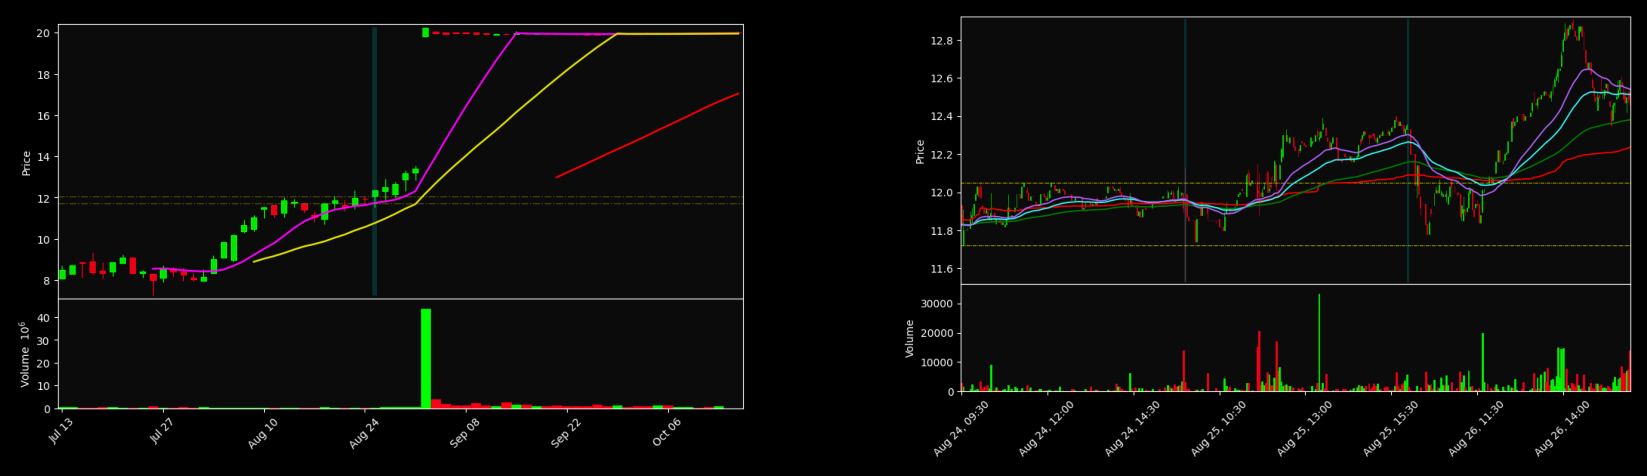

ARCH (2022-08-16)


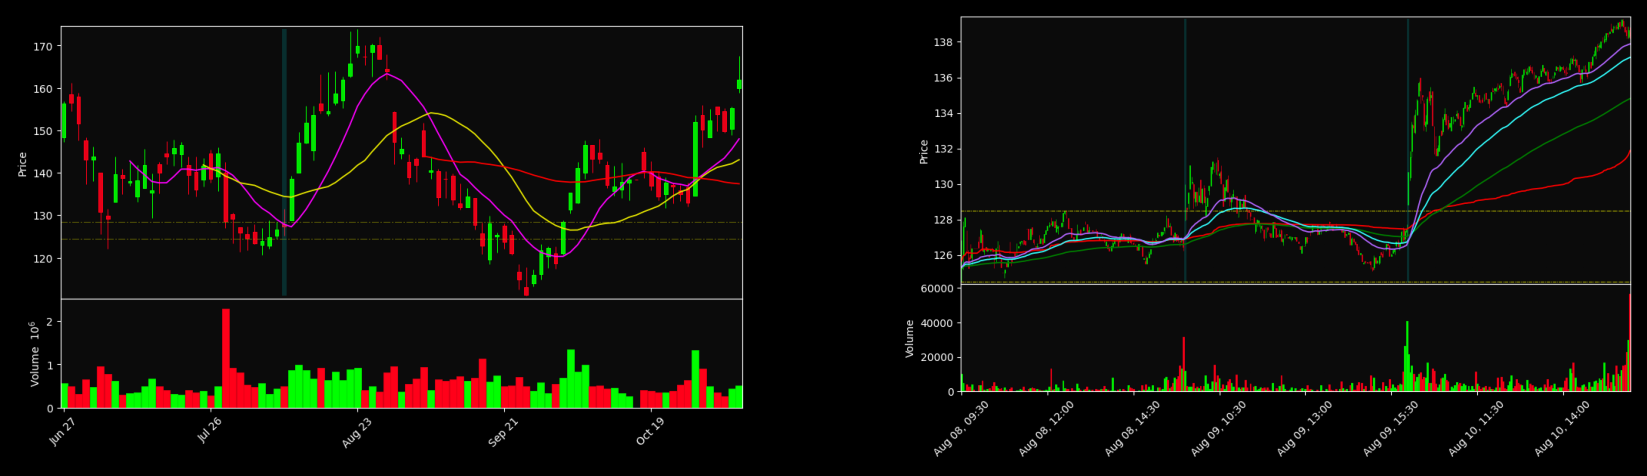

HRTX (2022-08-12)
<class 'ValueError'>
User specified line date "2022-08-05 16:00:00" is beyond (greater than) range of plotted data (2022-08-04 09:30:00 to 2022-08-05 15:57:00).
<Response [200]>
{"payload":[{"symbol":null,"open":2.97,"high":3.01,"low":2.97,"close":3.0,"volume":23940,"tickTime":"2022-08-04T09:30:00"},{"symbol":null,"open":2.98,"high":3.02,"low":2.98,"close":3.02,"volume":7185,"tickTime":"2022-08-04T09:33:00"},{"symbol":null,"open":3.02,"high":3.07,"low":3.0,"close":3.07,"volume":36251,"tickTime":"2022-08-04T09:36:00"},{"symbol":null,"open":3.07,"high":3.08,"low":3.04,"close":3.04,"volume":14475,"tickTime":"2022-08-04T09:39:00"},{"symbol":null,"open":3.05,"high":3.07,"low":3.04,"close":3.07,"volume":13664,"tickTime":"2022-08-04T09:42:00"},{"symbol":null,"open":3.07,"high":3.08,"low":3.04,"close":3.05,"volume":15133,"tickTime":"2022-08-04T09:45:00"},{"symbol":null,"open":3.05,"high":3.05,"low":3.02,"close":3.04,"volume":17966,"tickTime":"2022-08-04T09:48:00"},{"symbol":n

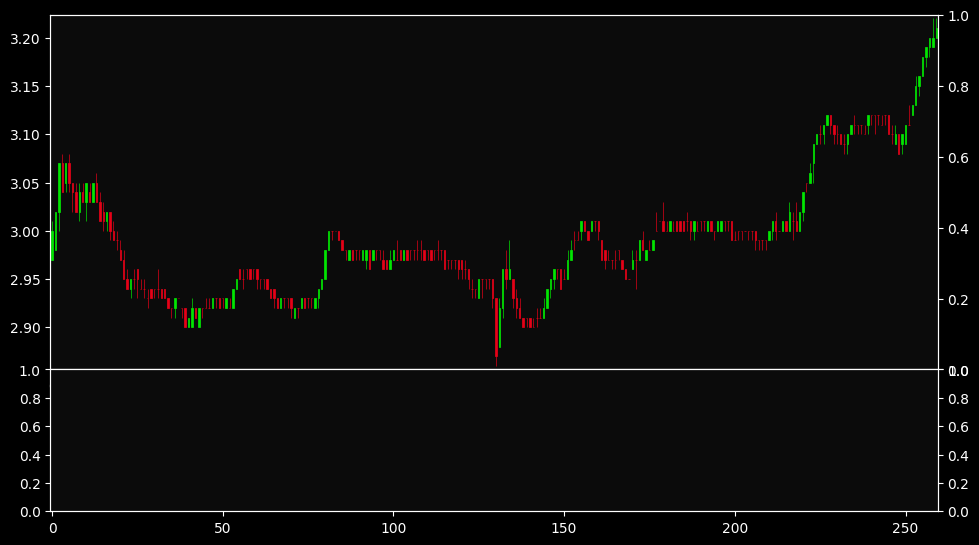

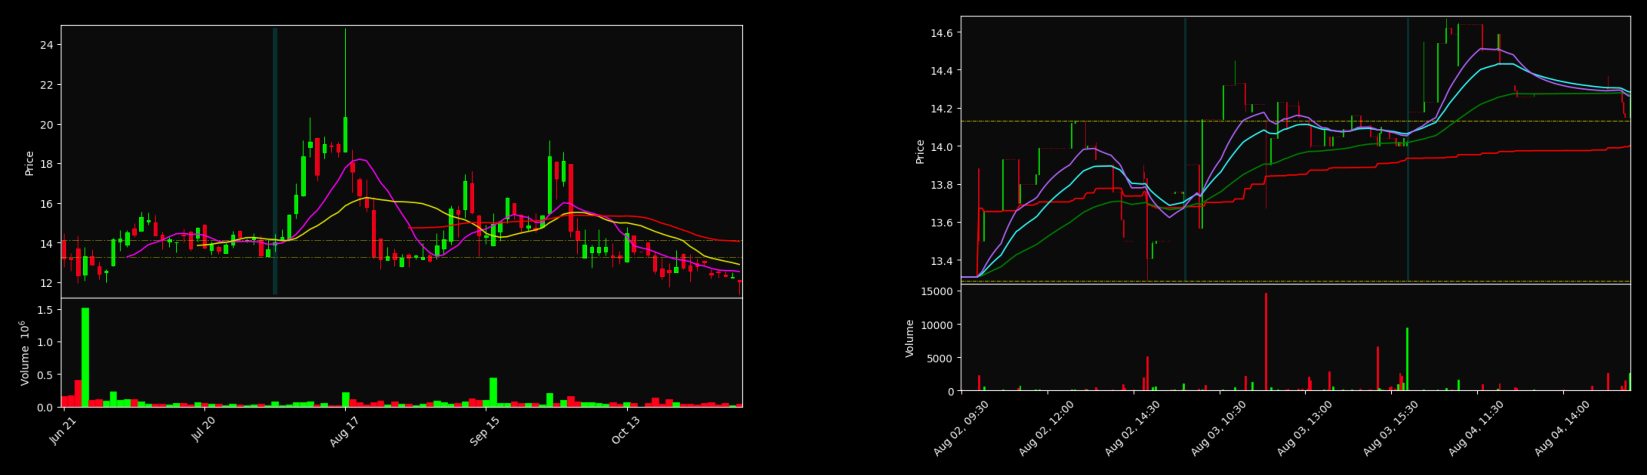

CERE (2022-08-10)


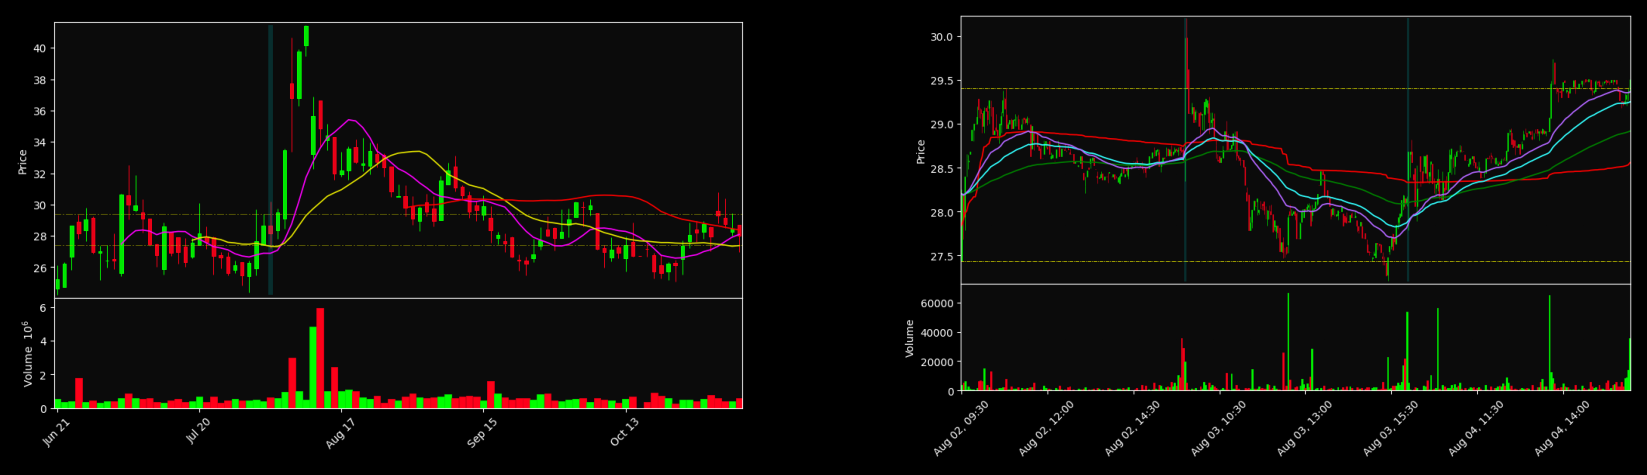

PLRX (2022-08-10)


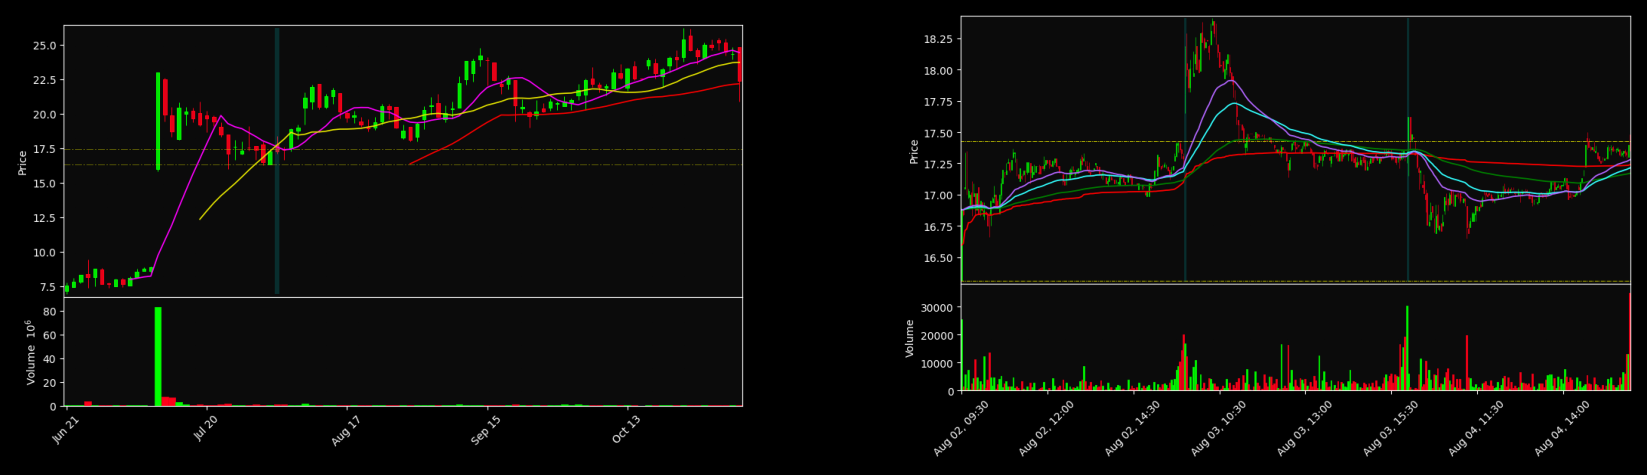

SGML (2022-08-10)


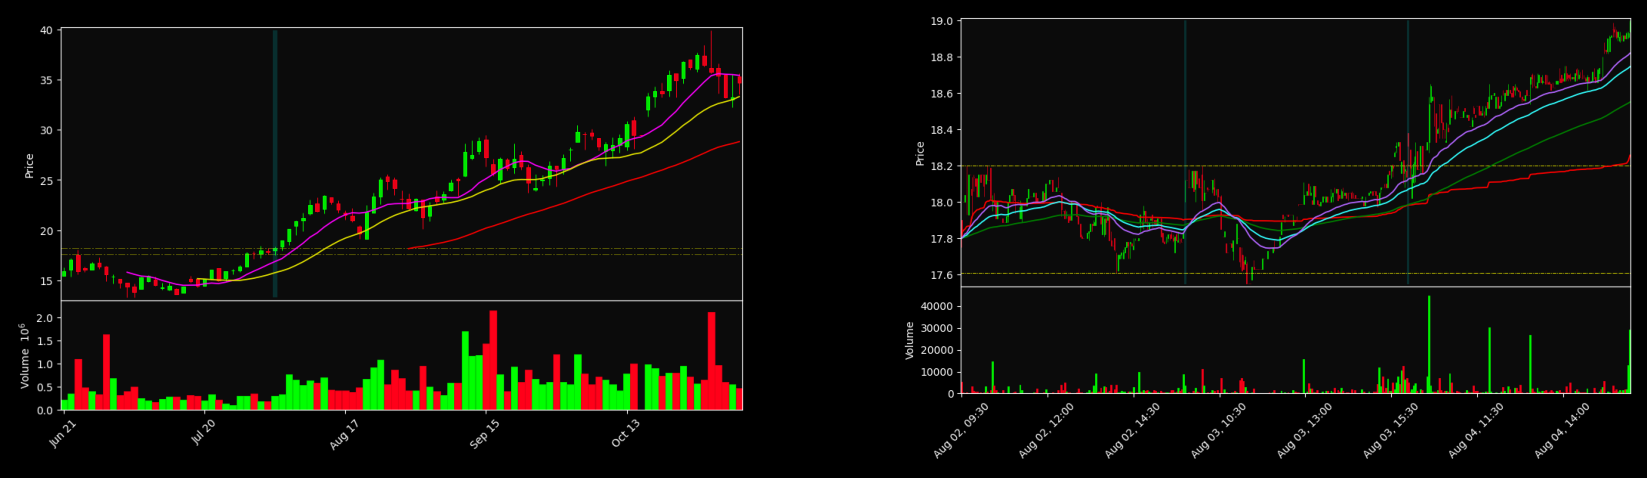

FMTX (2022-08-09)


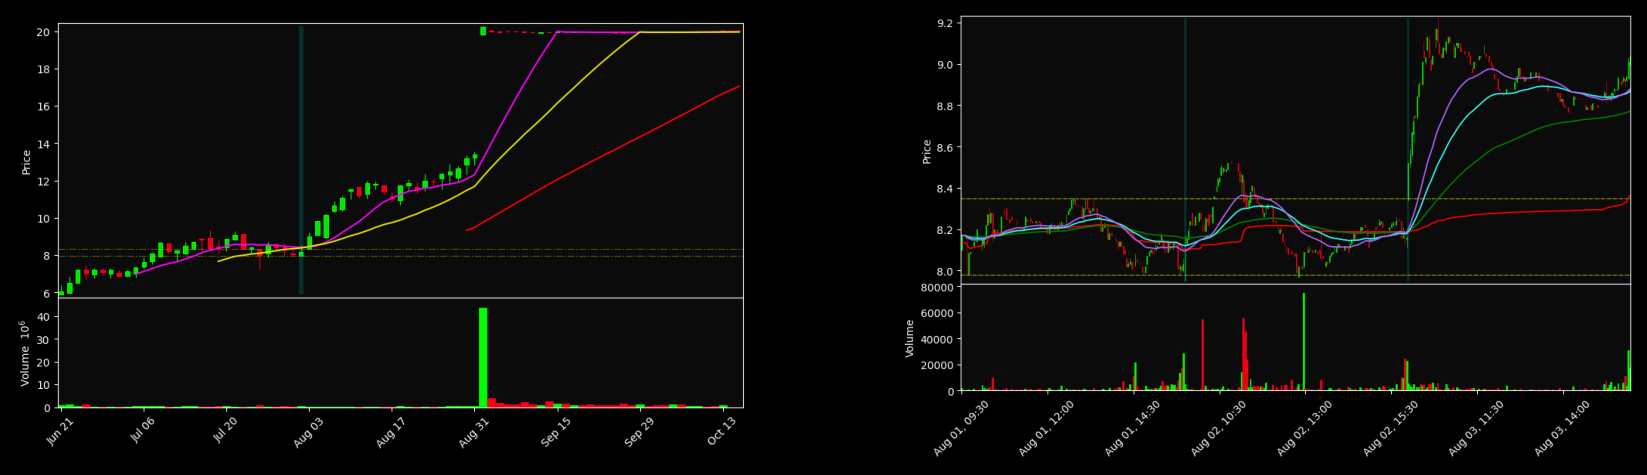

ADPT (2022-08-08)


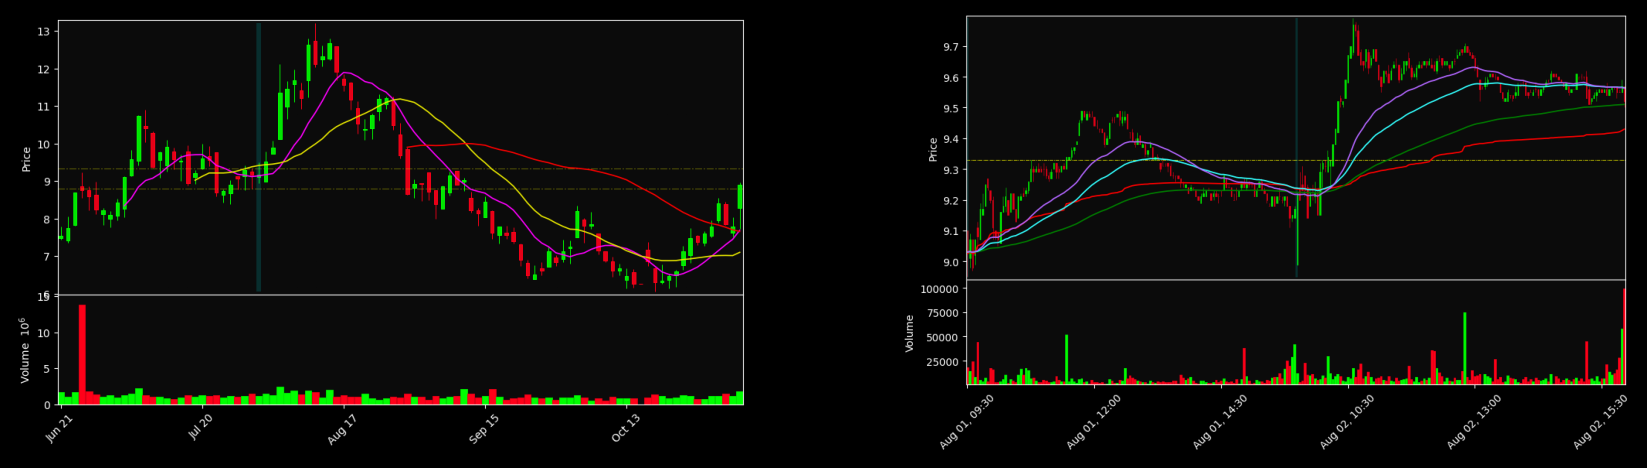

AEHR (2022-08-08)


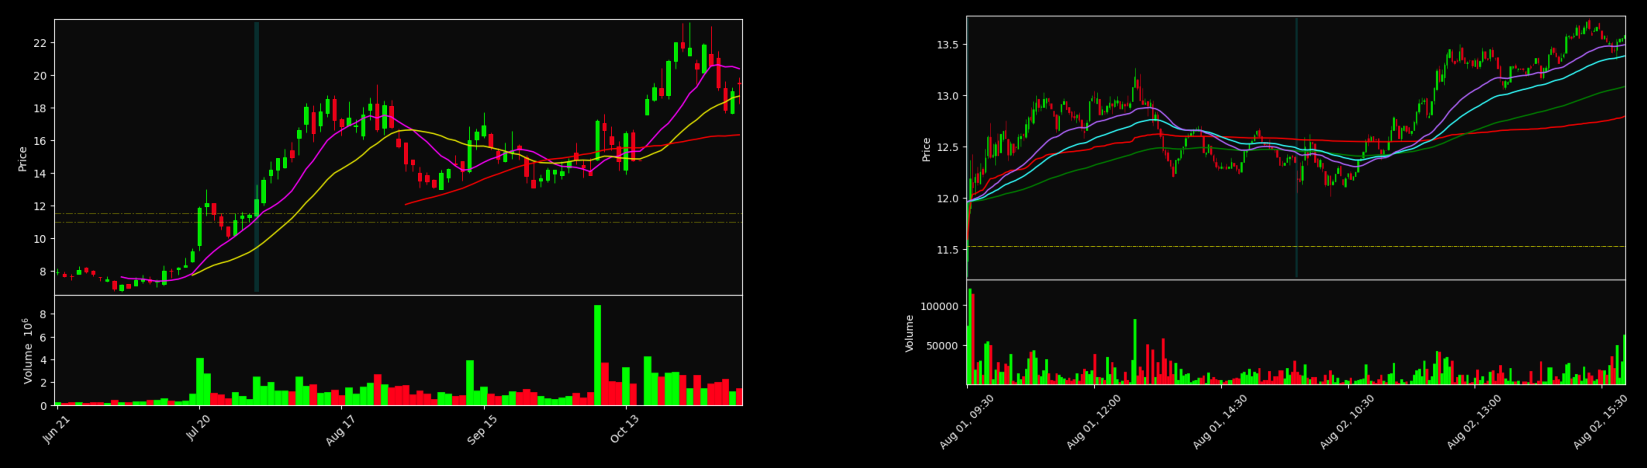

AYX (2022-08-08)


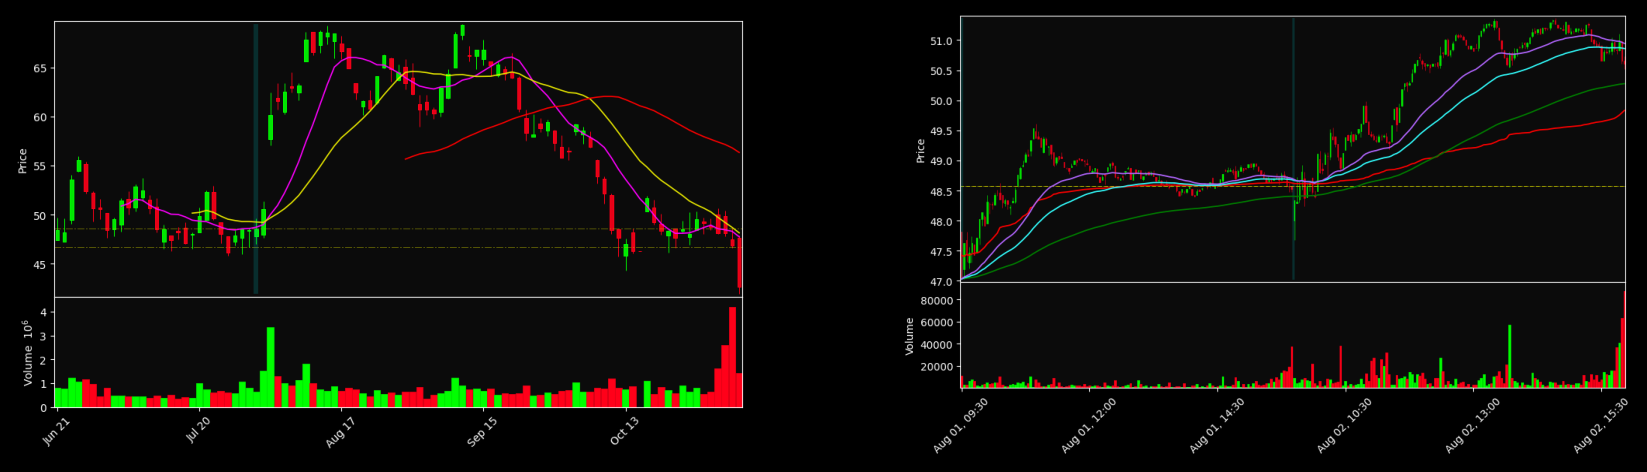

BCRX (2022-08-08)


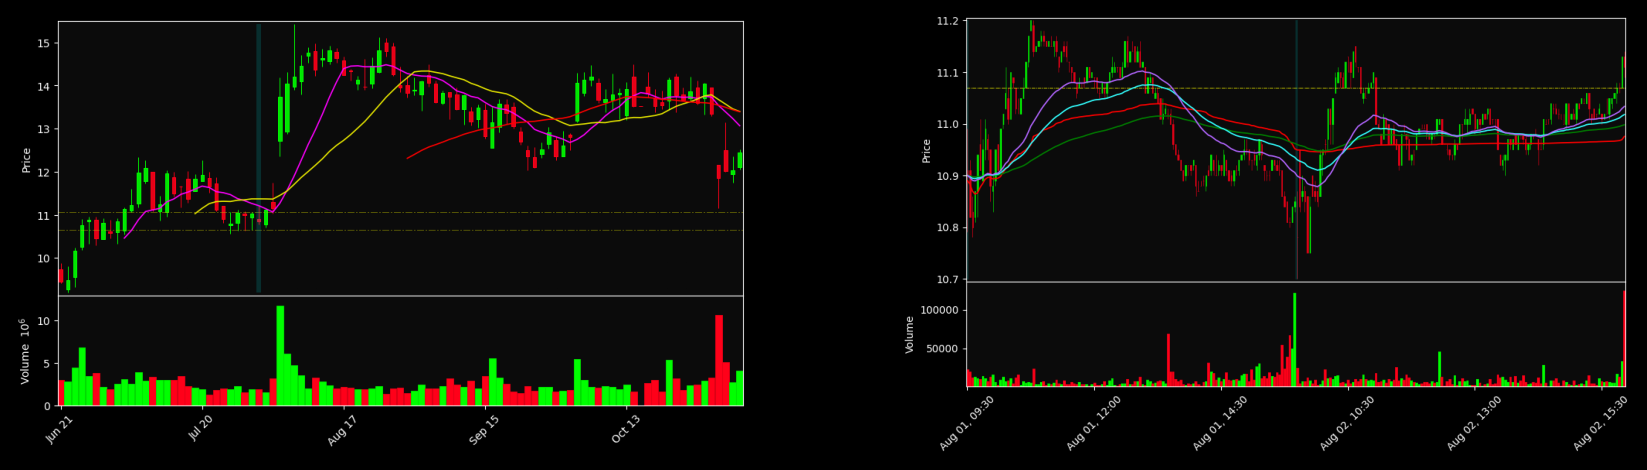

FUBO (2022-08-08)


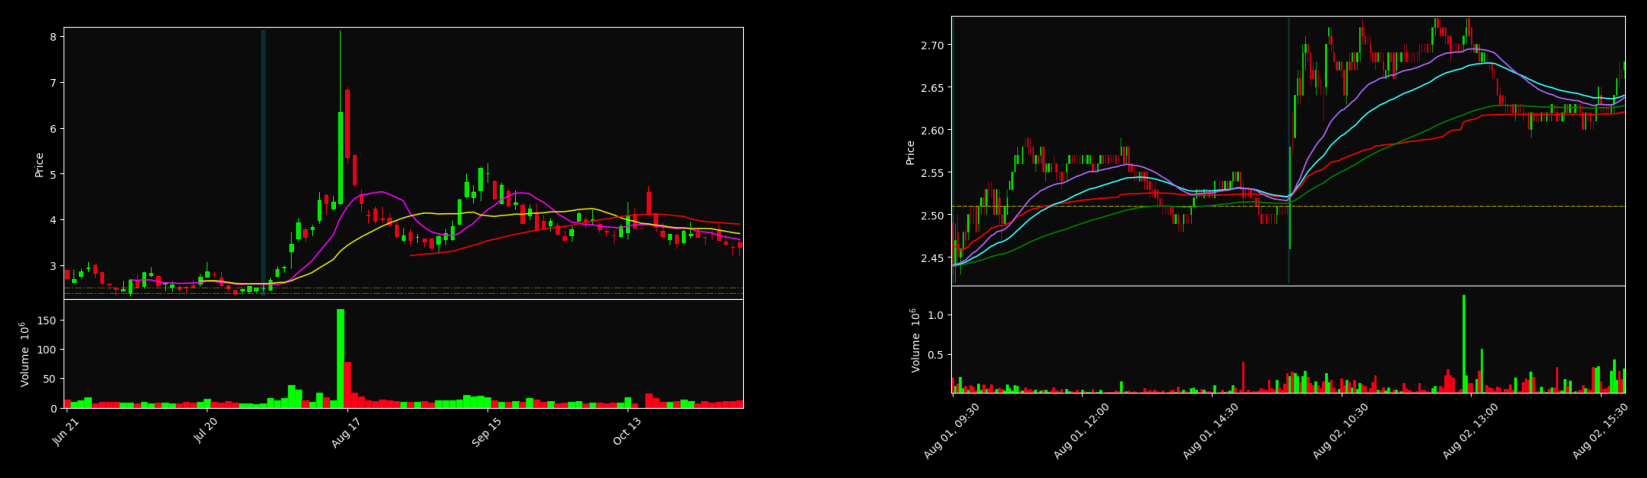

KYMR (2022-08-08)


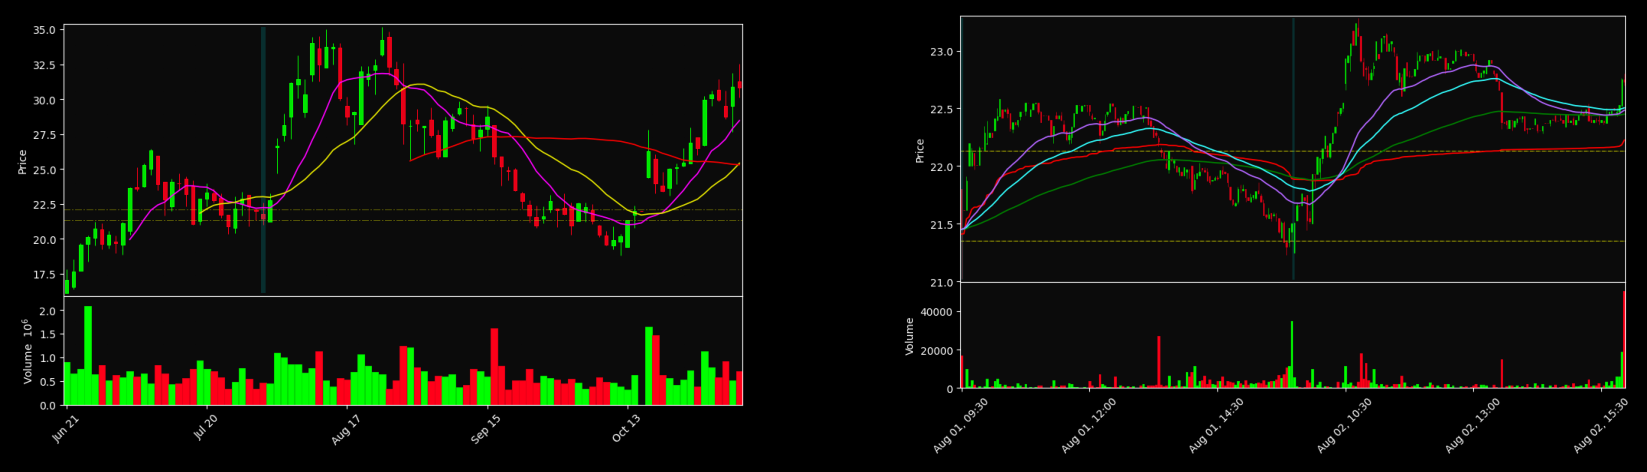

MNKD (2022-08-08)


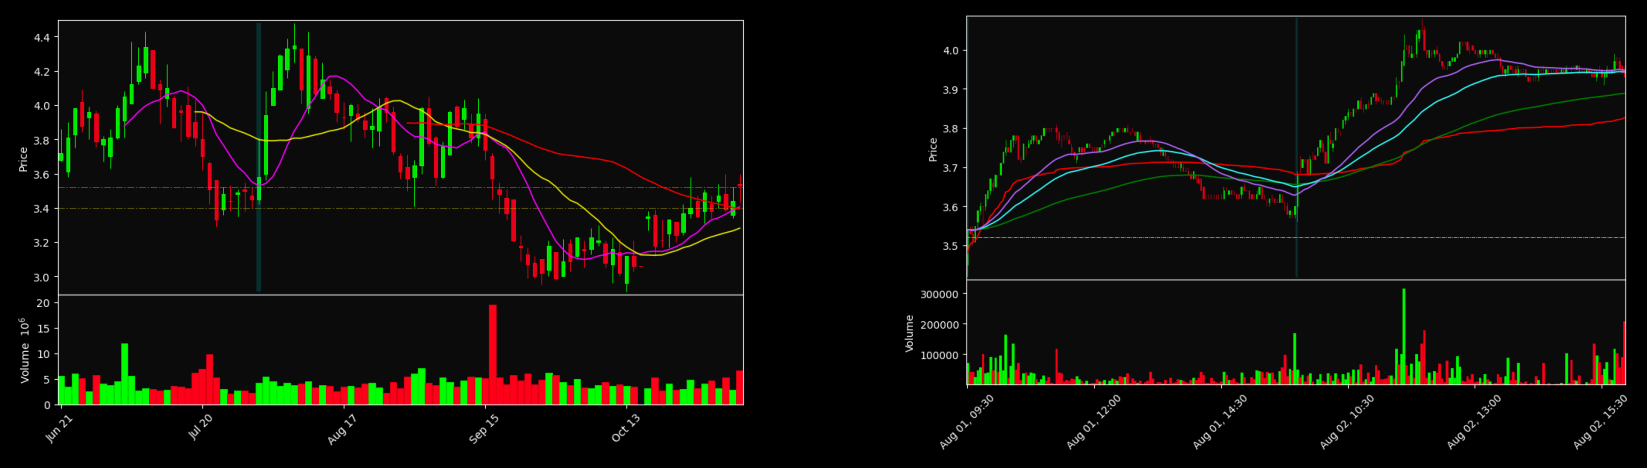

REAL (2022-08-08)


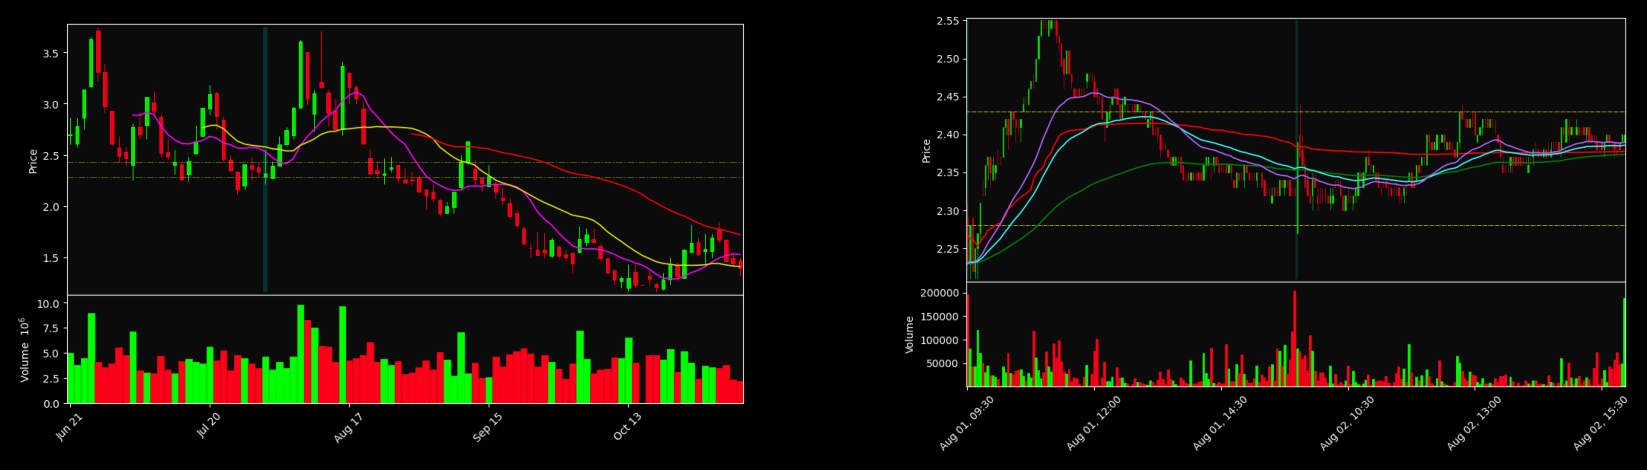

TSVT (2022-08-08)


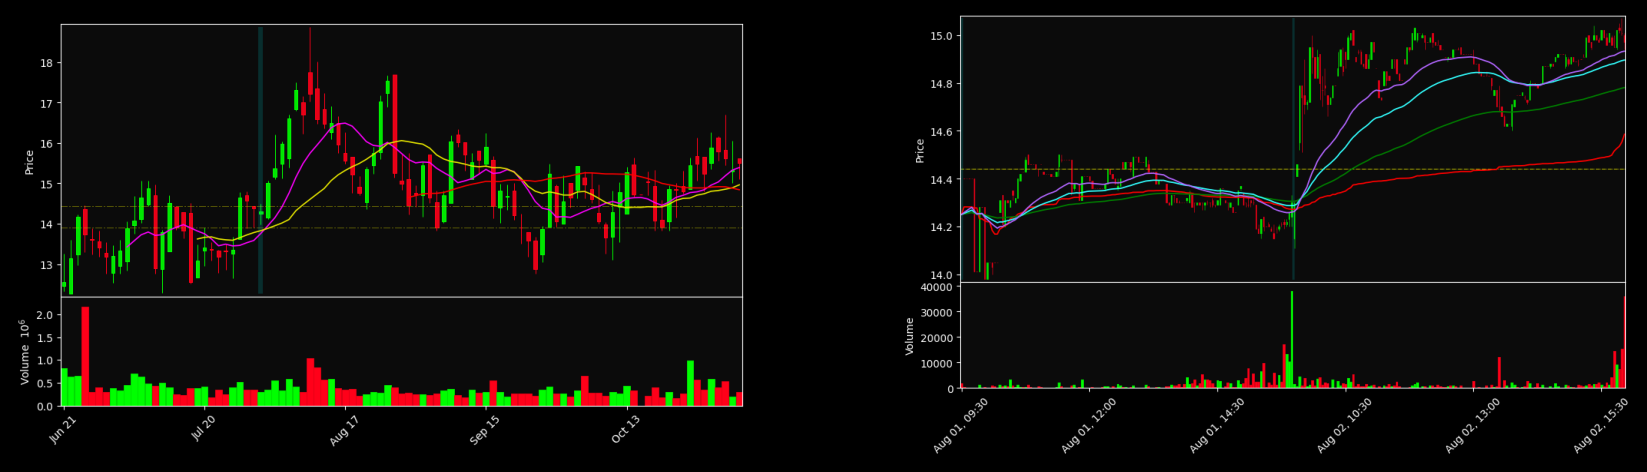

U (2022-08-08)


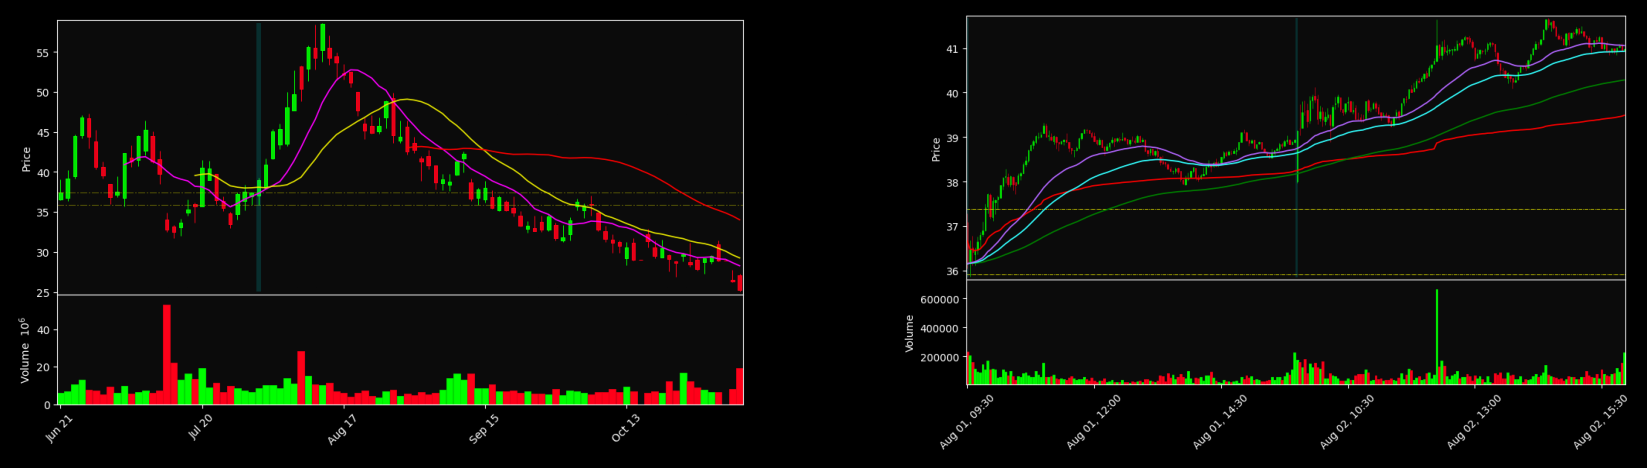

ENTA (2022-08-05)
<class 'ValueError'>
User specified line date "2022-07-29 16:00:00" is beyond (greater than) range of plotted data (2022-07-28 09:30:00 to 2022-07-29 15:57:00).
<Response [200]>
{"payload":[{"symbol":null,"open":50.38,"high":50.38,"low":49.88,"close":49.88,"volume":848,"tickTime":"2022-07-28T09:30:00"},{"symbol":null,"open":49.88,"high":49.88,"low":49.88,"close":49.88,"volume":0,"tickTime":"2022-07-28T09:33:00"},{"symbol":null,"open":49.85,"high":49.85,"low":49.34,"close":49.34,"volume":1085,"tickTime":"2022-07-28T09:36:00"},{"symbol":null,"open":49.3,"high":49.3,"low":49.3,"close":49.3,"volume":127,"tickTime":"2022-07-28T09:39:00"},{"symbol":null,"open":49.3,"high":49.3,"low":48.85,"close":48.86,"volume":2269,"tickTime":"2022-07-28T09:42:00"},{"symbol":null,"open":48.86,"high":49.0,"low":48.86,"close":48.95,"volume":393,"tickTime":"2022-07-28T09:45:00"},{"symbol":null,"open":49.2,"high":49.2,"low":49.2,"close":49.2,"volume":181,"tickTime":"2022-07-28T09:48:00"},{"sym

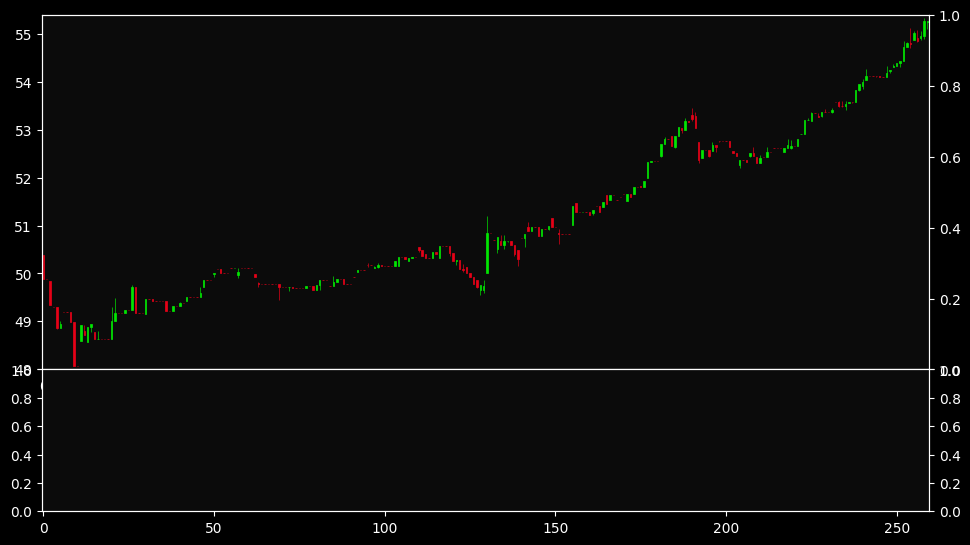

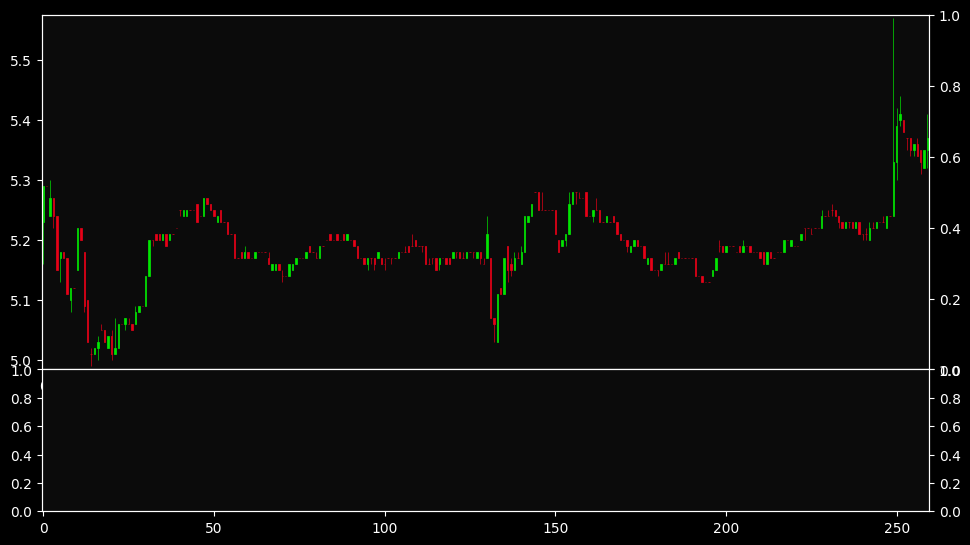

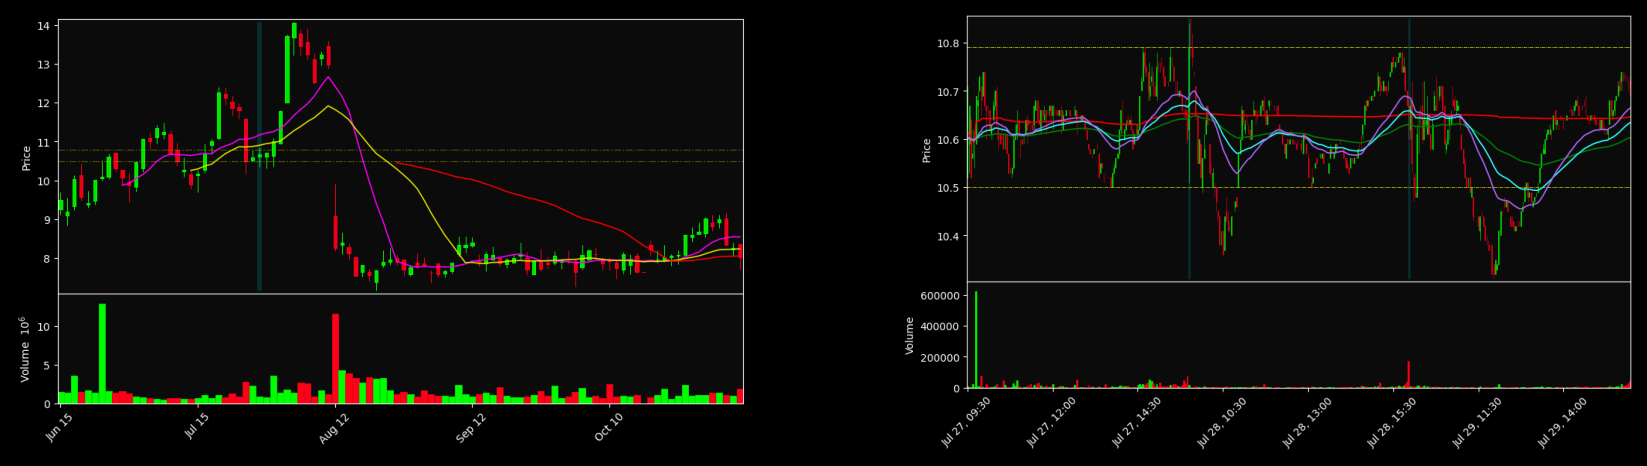

BE (2022-08-03)


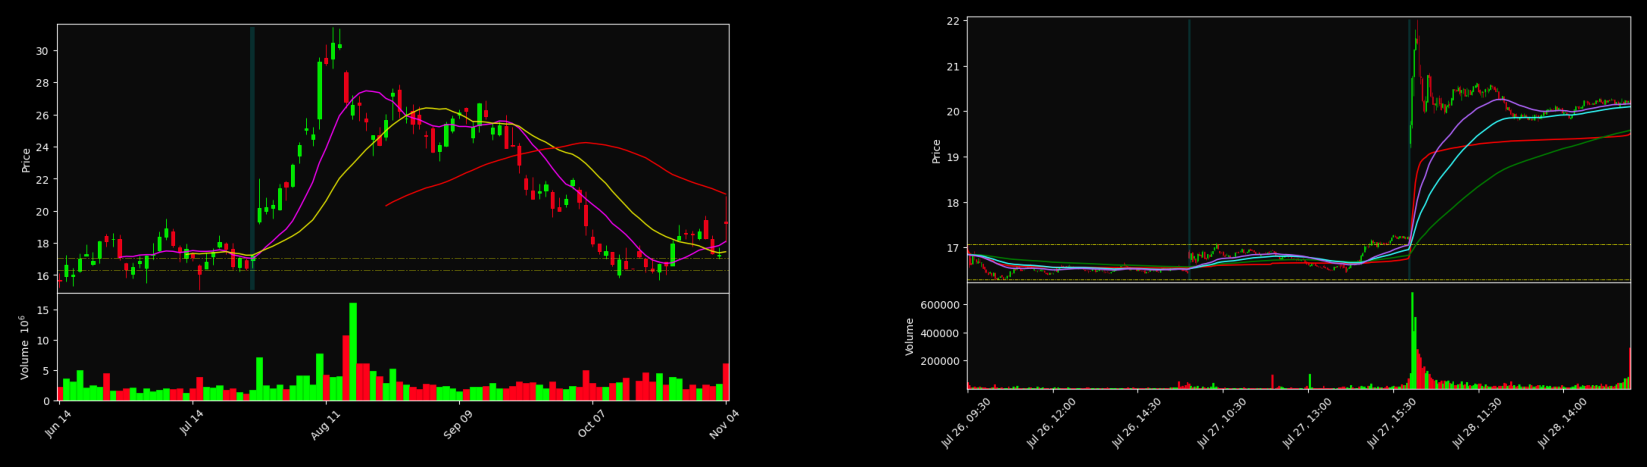

CELH (2022-08-03)


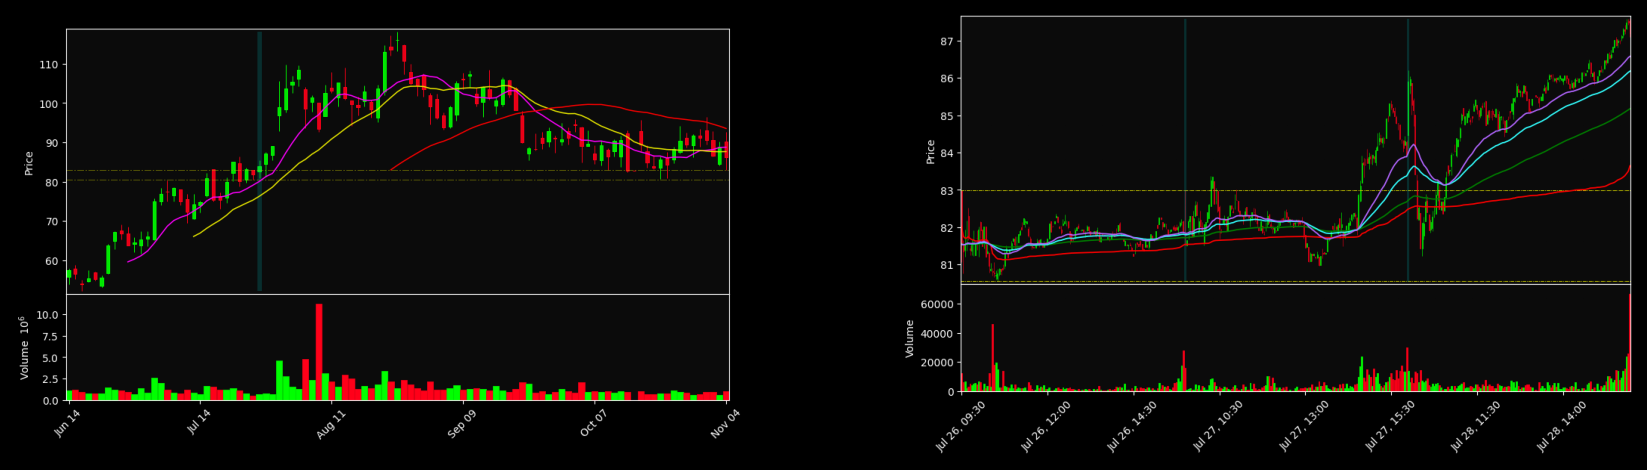

DTC (2022-08-03)


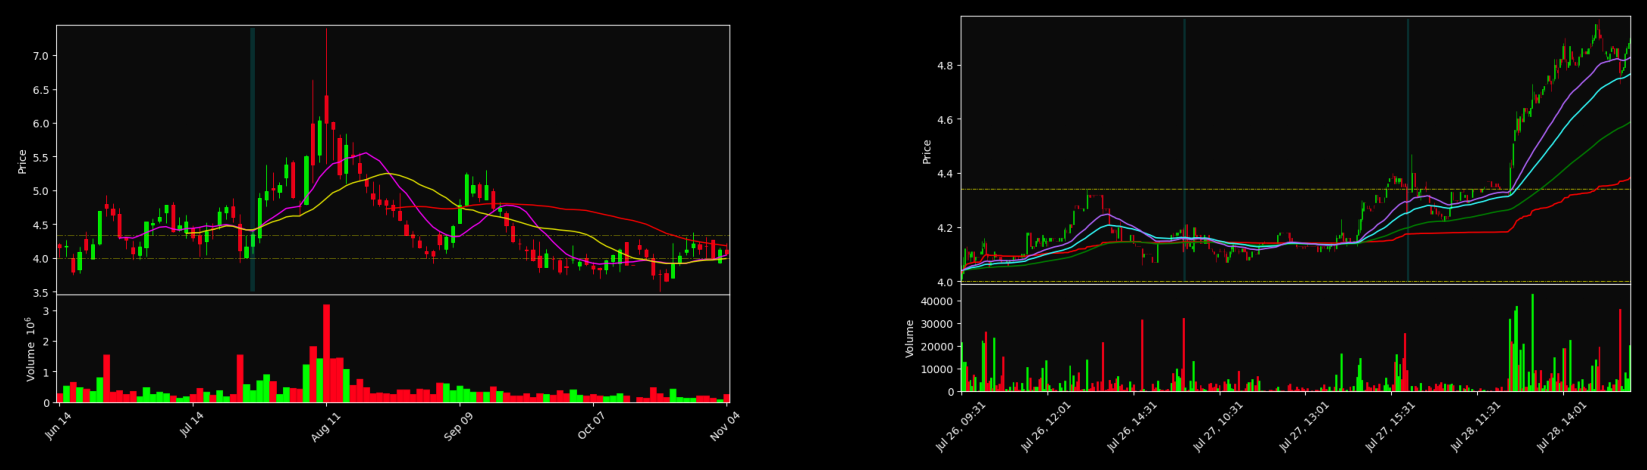

HSCS (2022-08-03)


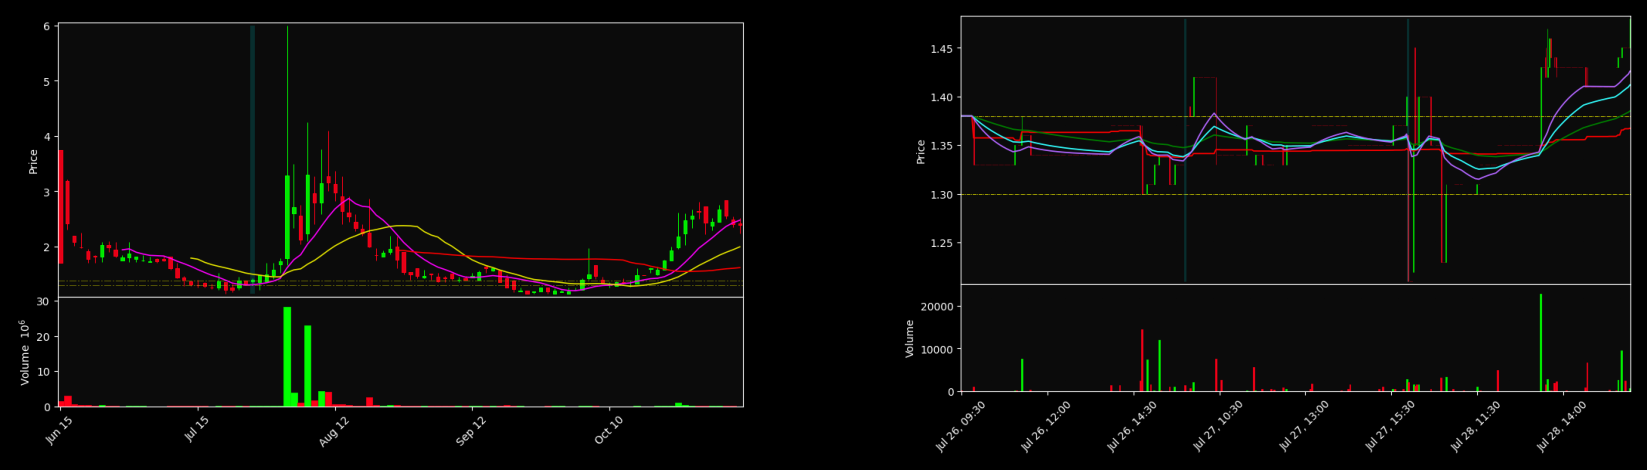

AMRC (2022-08-02)


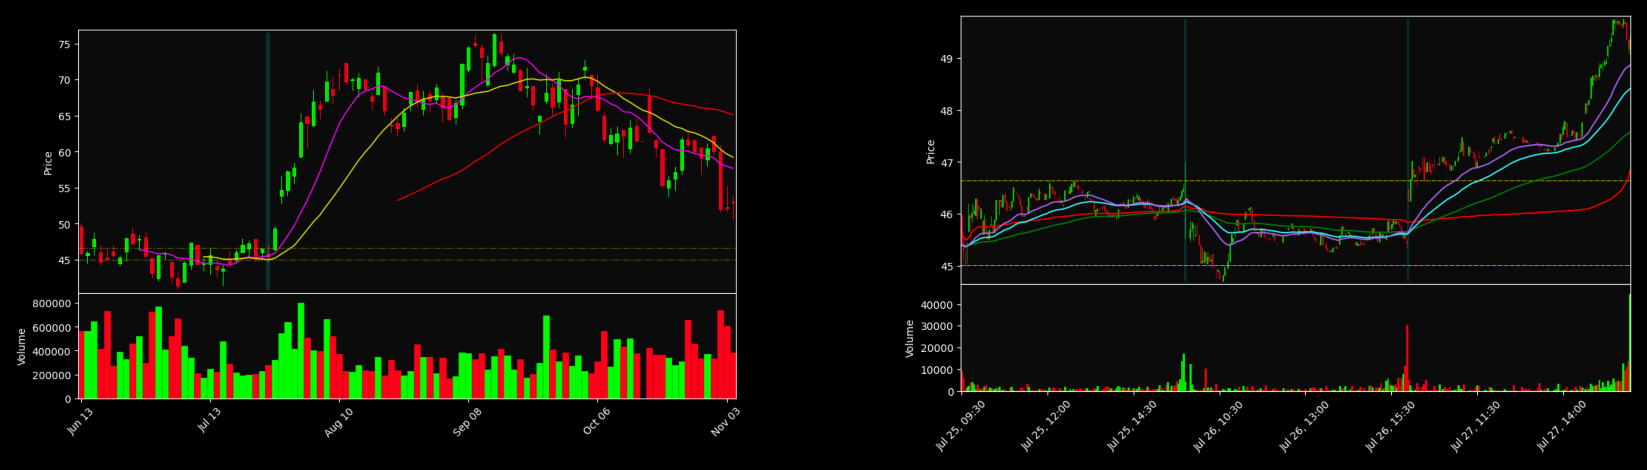

HKD (2022-08-02)


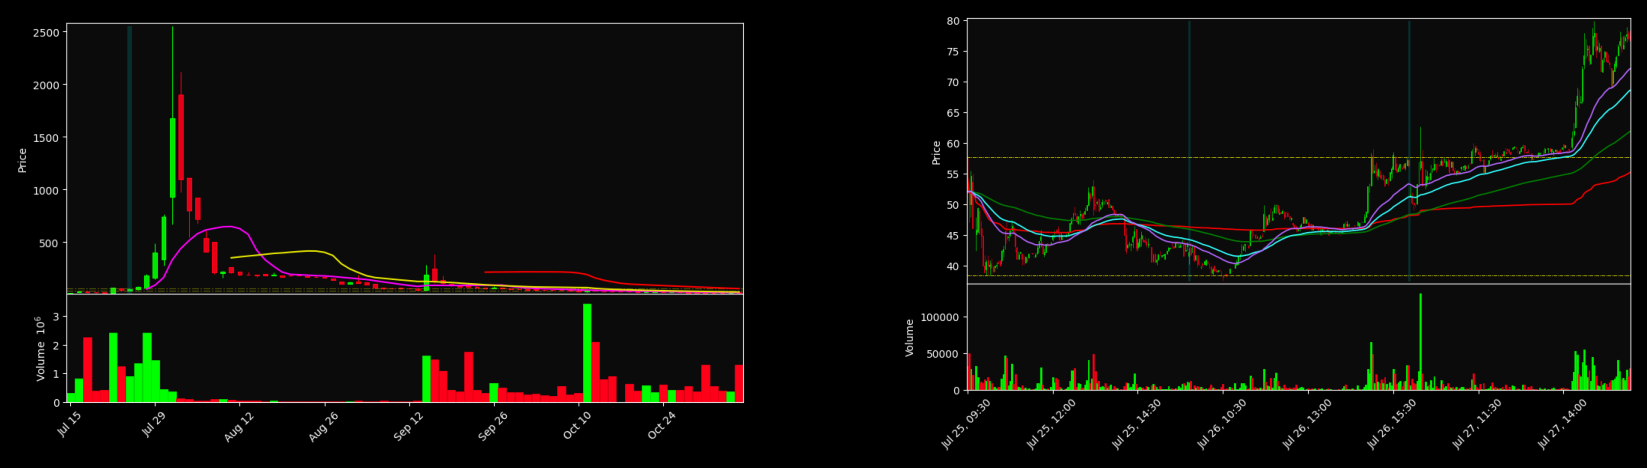

AVTE (2022-08-01)


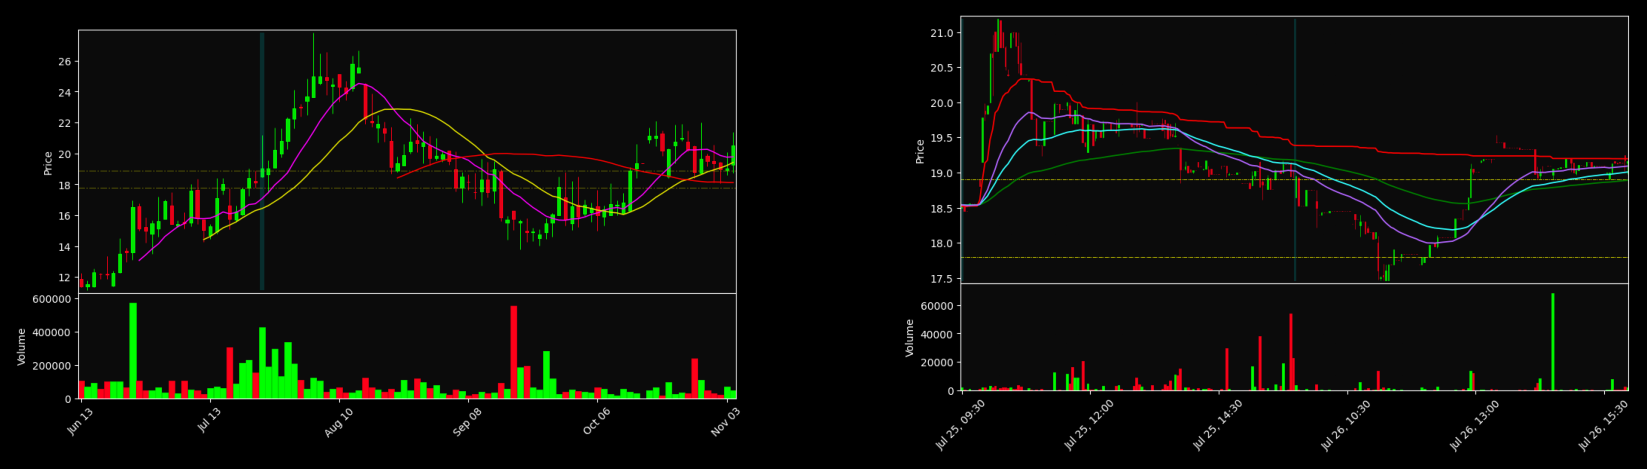

ARRY (2022-07-29)
<class 'ValueError'>
User specified line date "2022-07-22 16:00:00" is beyond (greater than) range of plotted data (2022-07-21 09:30:00 to 2022-07-22 15:57:00).
<Response [200]>
{"payload":[{"symbol":null,"open":11.93,"high":12.11,"low":11.93,"close":12.07,"volume":54732,"tickTime":"2022-07-21T09:30:00"},{"symbol":null,"open":12.07,"high":12.09,"low":11.88,"close":11.88,"volume":32739,"tickTime":"2022-07-21T09:33:00"},{"symbol":null,"open":11.87,"high":11.9,"low":11.65,"close":11.65,"volume":27671,"tickTime":"2022-07-21T09:36:00"},{"symbol":null,"open":11.65,"high":11.85,"low":11.65,"close":11.83,"volume":11799,"tickTime":"2022-07-21T09:39:00"},{"symbol":null,"open":11.86,"high":11.86,"low":11.66,"close":11.66,"volume":13332,"tickTime":"2022-07-21T09:42:00"},{"symbol":null,"open":11.65,"high":11.73,"low":11.61,"close":11.67,"volume":13217,"tickTime":"2022-07-21T09:45:00"},{"symbol":null,"open":11.66,"high":11.74,"low":11.63,"close":11.7,"volume":11098,"tickTime":"2022

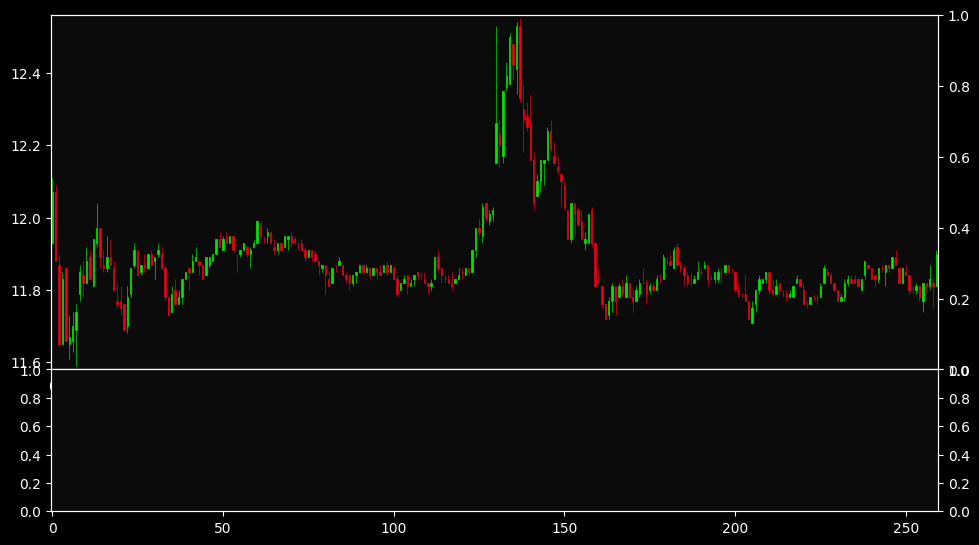

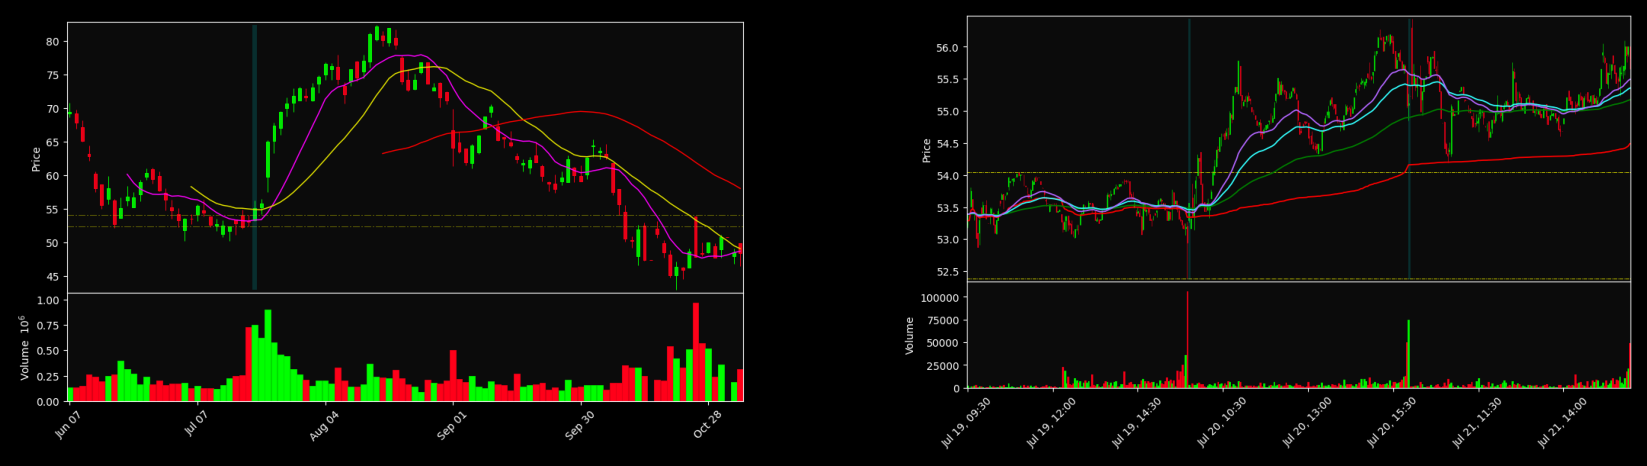

PBTS (2022-07-22)
<class 'ValueError'>
User specified line date "2022-07-15 16:00:00" is beyond (greater than) range of plotted data (2022-07-14 09:30:00 to 2022-07-15 15:57:00).
<Response [200]>
{"payload":[{"symbol":null,"open":0.77,"high":0.85,"low":0.77,"close":0.84,"volume":320626,"tickTime":"2022-07-14T09:30:00"},{"symbol":null,"open":0.85,"high":0.85,"low":0.77,"close":0.79,"volume":92500,"tickTime":"2022-07-14T09:33:00"},{"symbol":null,"open":0.8,"high":0.82,"low":0.77,"close":0.8,"volume":55174,"tickTime":"2022-07-14T09:36:00"},{"symbol":null,"open":0.78,"high":0.82,"low":0.78,"close":0.81,"volume":24428,"tickTime":"2022-07-14T09:39:00"},{"symbol":null,"open":0.8,"high":0.81,"low":0.79,"close":0.81,"volume":4548,"tickTime":"2022-07-14T09:42:00"},{"symbol":null,"open":0.8,"high":0.81,"low":0.8,"close":0.81,"volume":3342,"tickTime":"2022-07-14T09:45:00"},{"symbol":null,"open":0.8,"high":0.81,"low":0.79,"close":0.79,"volume":27057,"tickTime":"2022-07-14T09:48:00"},{"symbol":null,

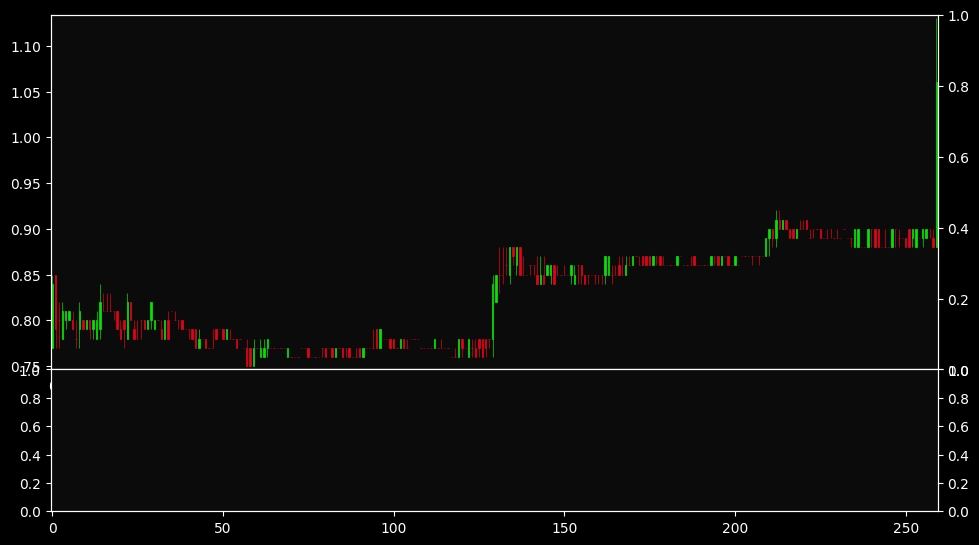

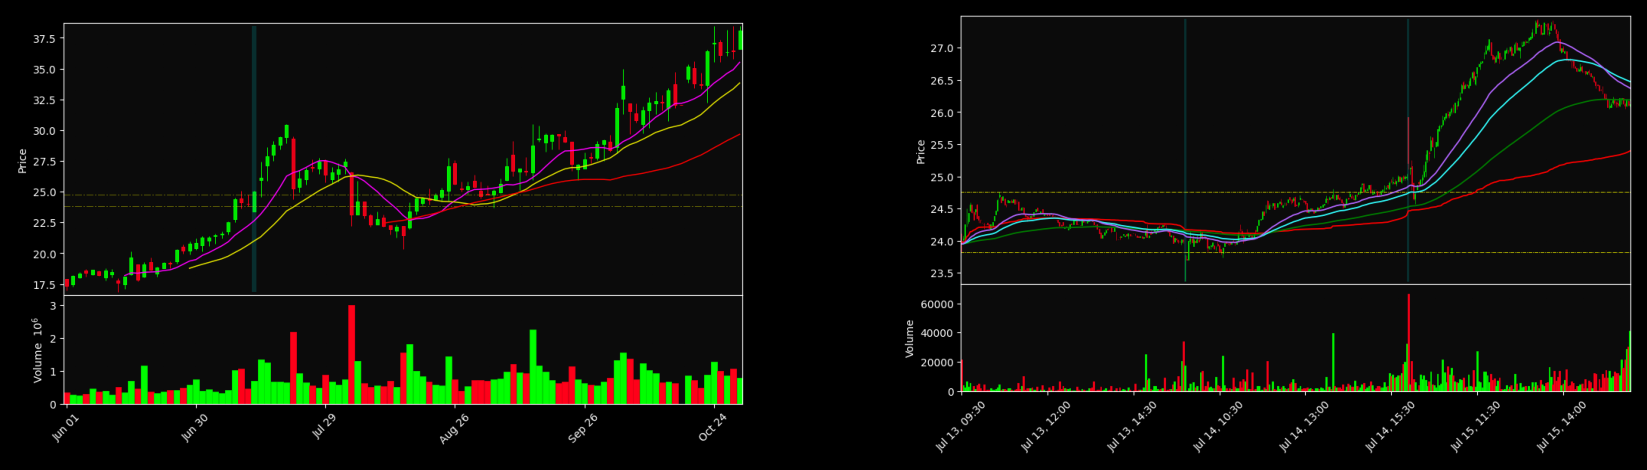

BEAM (2022-07-19)


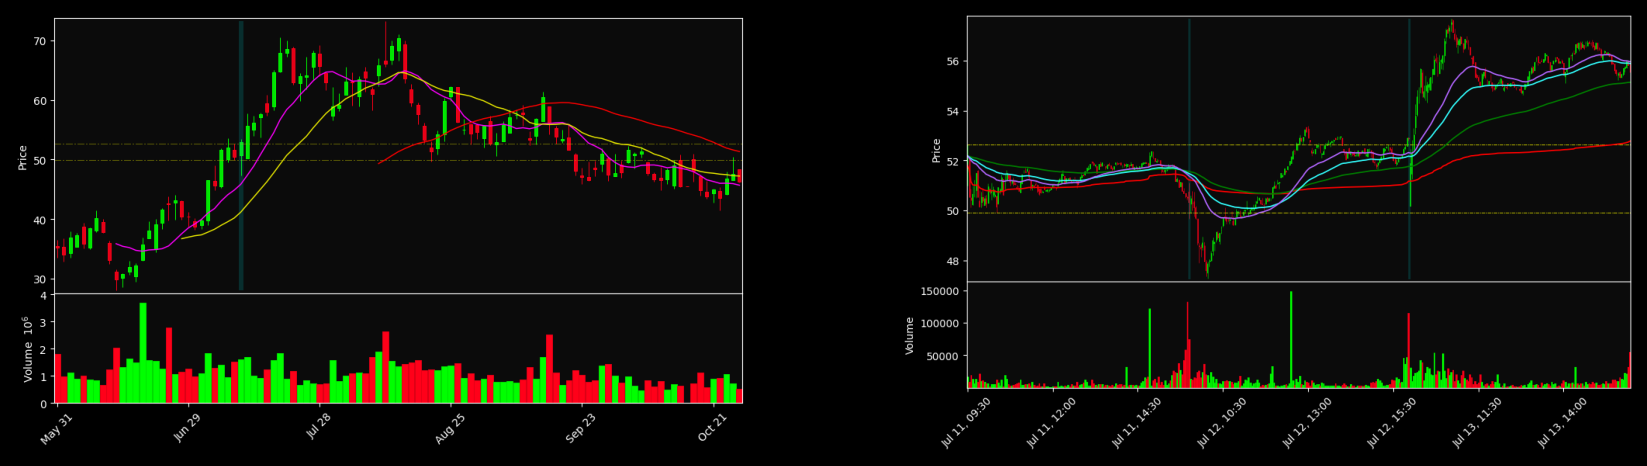

SANA (2022-07-08)


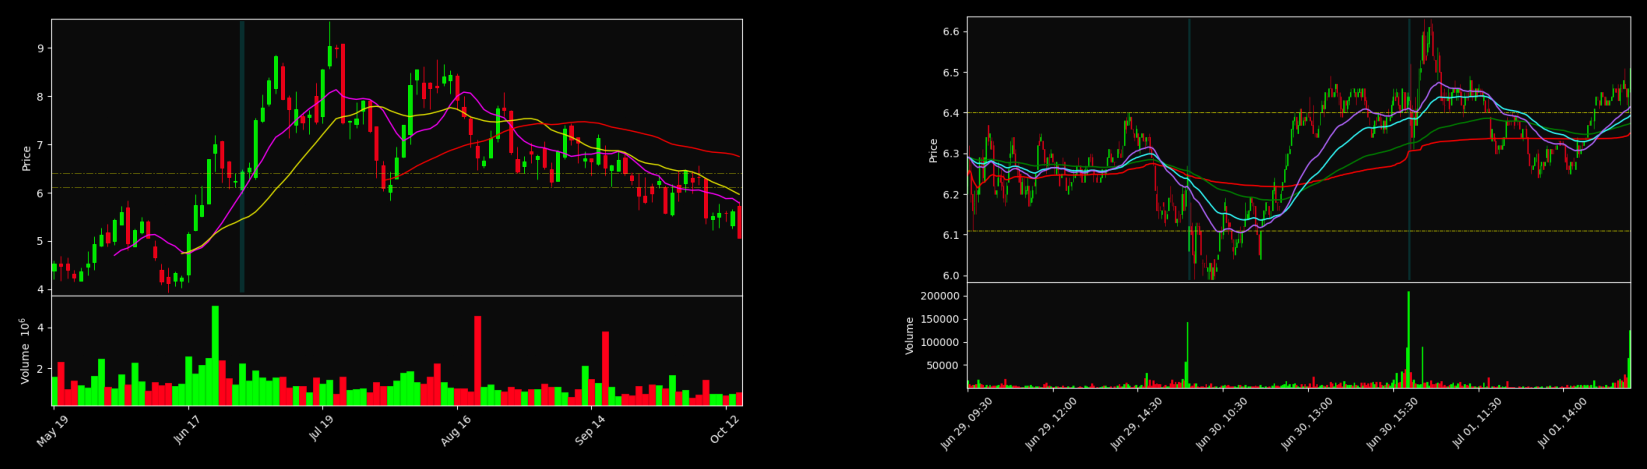

GERN (2022-07-01)
<class 'ValueError'>
User specified line date "2022-06-24 16:00:00" is beyond (greater than) range of plotted data (2022-06-23 09:30:00 to 2022-06-24 15:57:00).
<Response [200]>
{"payload":[{"symbol":null,"open":1.29,"high":1.33,"low":1.29,"close":1.33,"volume":21605,"tickTime":"2022-06-23T09:30:00"},{"symbol":null,"open":1.33,"high":1.33,"low":1.31,"close":1.32,"volume":12010,"tickTime":"2022-06-23T09:33:00"},{"symbol":null,"open":1.31,"high":1.33,"low":1.31,"close":1.33,"volume":1844,"tickTime":"2022-06-23T09:36:00"},{"symbol":null,"open":1.33,"high":1.33,"low":1.32,"close":1.33,"volume":2140,"tickTime":"2022-06-23T09:39:00"},{"symbol":null,"open":1.33,"high":1.33,"low":1.32,"close":1.32,"volume":4584,"tickTime":"2022-06-23T09:42:00"},{"symbol":null,"open":1.33,"high":1.34,"low":1.33,"close":1.34,"volume":14342,"tickTime":"2022-06-23T09:45:00"},{"symbol":null,"open":1.34,"high":1.34,"low":1.34,"close":1.34,"volume":2924,"tickTime":"2022-06-23T09:48:00"},{"symbol":nu

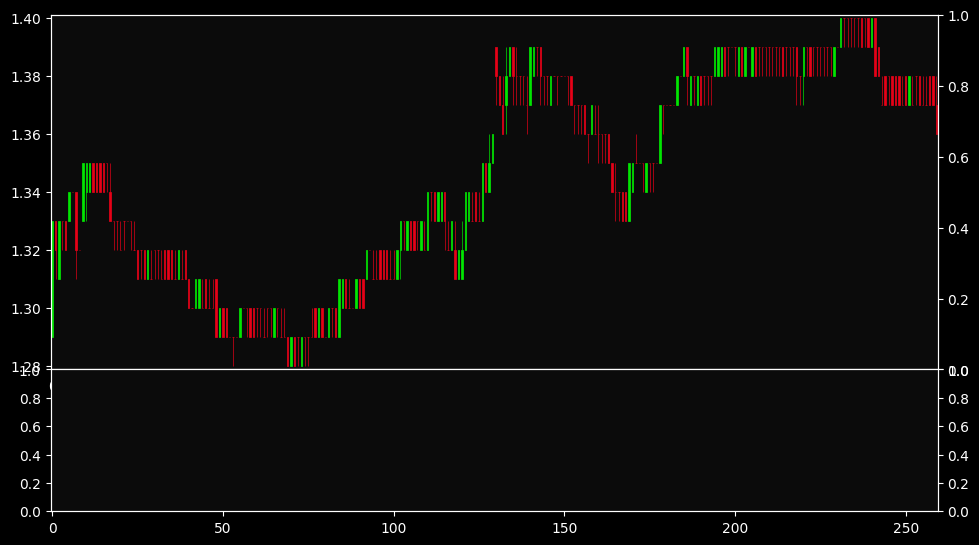

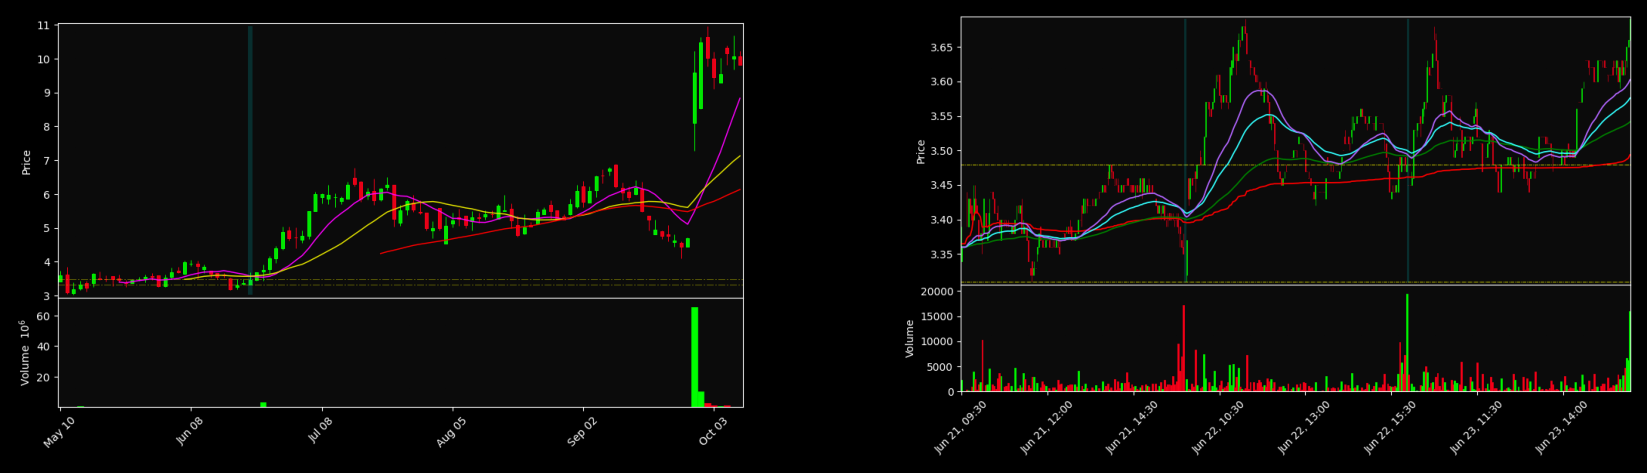

GERN (2022-06-28)


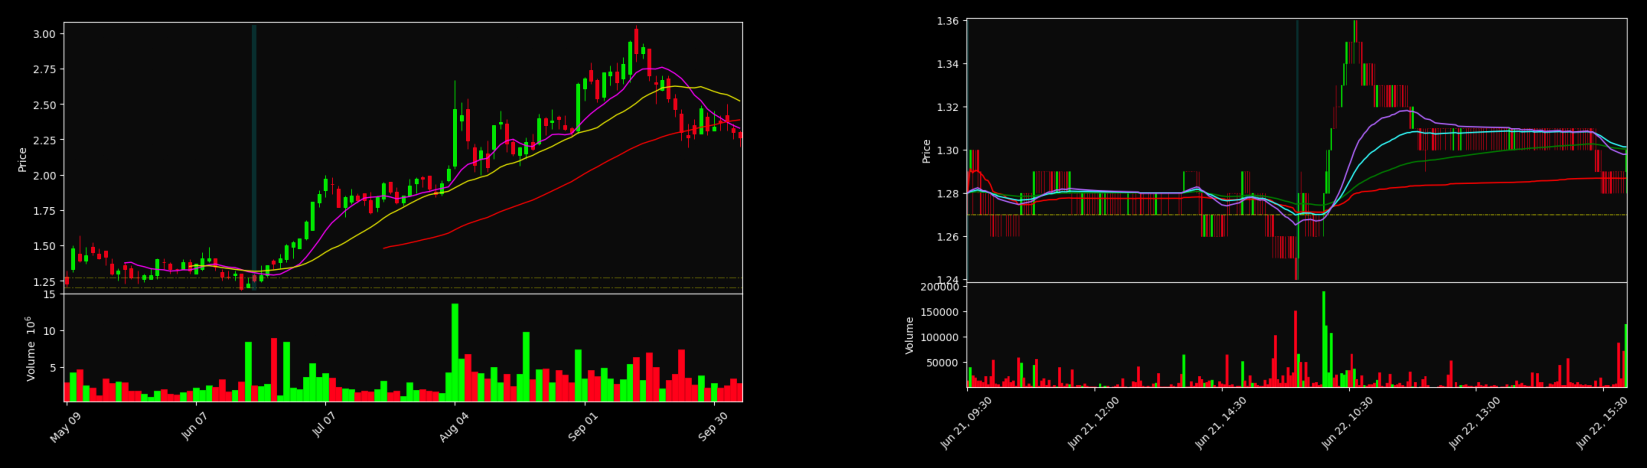

SMFL (2022-06-28)


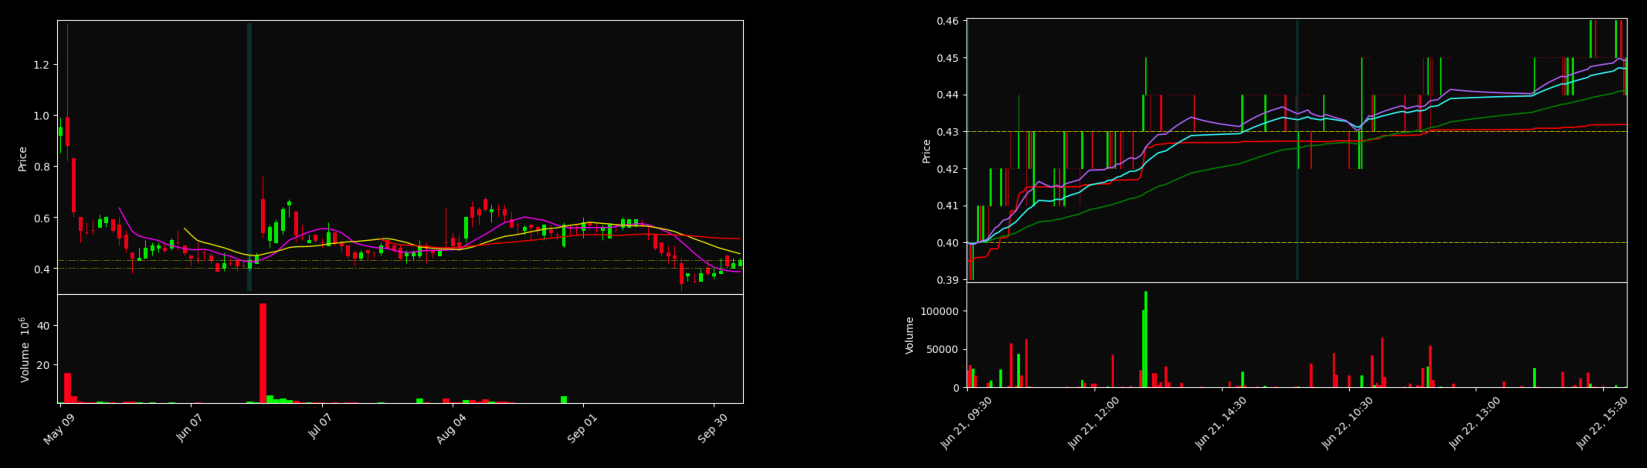

AVEO (2022-06-27)
<class 'ValueError'>
User specified line date "2022-06-17 16:00:00" is beyond (greater than) range of plotted data (2022-06-16 09:30:00 to 2022-06-17 15:57:00).
<Response [200]>
{"payload":[{"symbol":null,"open":4.03,"high":4.03,"low":4.03,"close":4.03,"volume":110,"tickTime":"2022-06-16T09:30:00"},{"symbol":null,"open":4.03,"high":4.03,"low":4.03,"close":4.03,"volume":0,"tickTime":"2022-06-16T09:33:00"},{"symbol":null,"open":4.06,"high":4.09,"low":4.05,"close":4.05,"volume":2981,"tickTime":"2022-06-16T09:36:00"},{"symbol":null,"open":4.05,"high":4.07,"low":4.0,"close":4.05,"volume":60819,"tickTime":"2022-06-16T09:39:00"},{"symbol":null,"open":4.06,"high":4.06,"low":4.06,"close":4.06,"volume":1000,"tickTime":"2022-06-16T09:42:00"},{"symbol":null,"open":4.06,"high":4.07,"low":4.05,"close":4.07,"volume":830,"tickTime":"2022-06-16T09:45:00"},{"symbol":null,"open":4.07,"high":4.09,"low":4.07,"close":4.09,"volume":488,"tickTime":"2022-06-16T09:48:00"},{"symbol":null,"open"

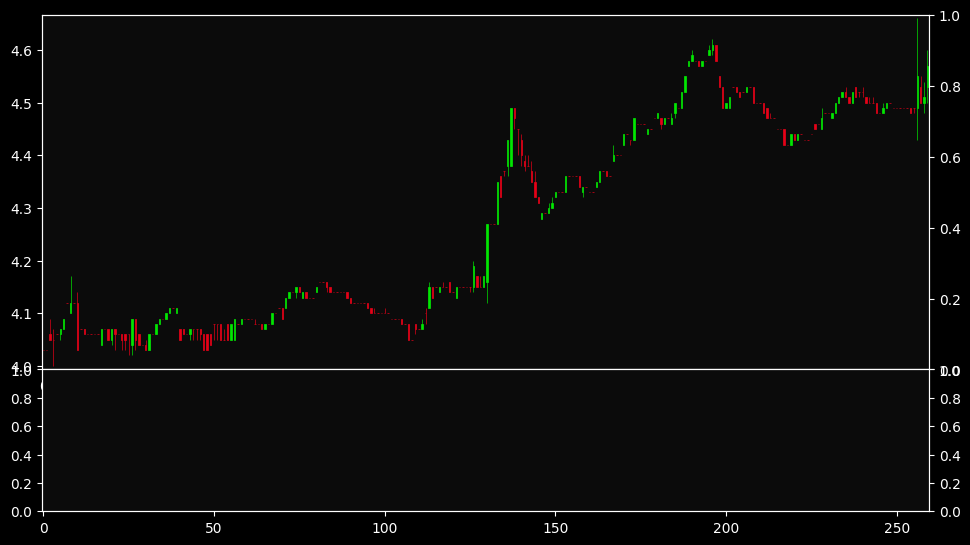

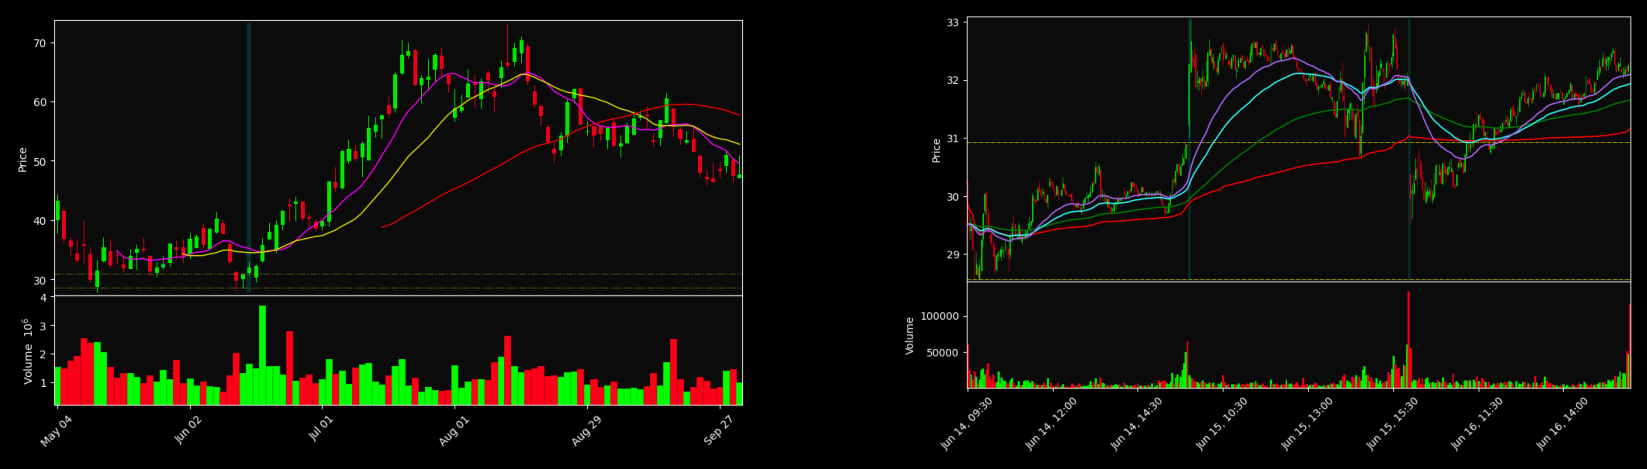

FOLD (2022-06-23)


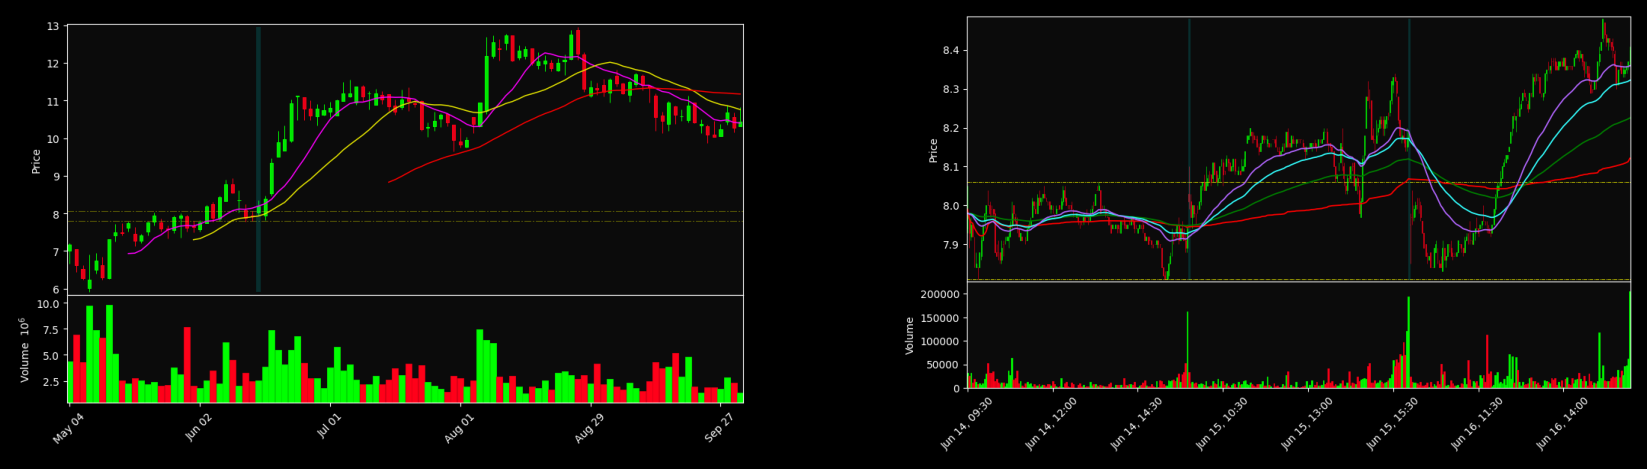

ACLX (2022-06-09)


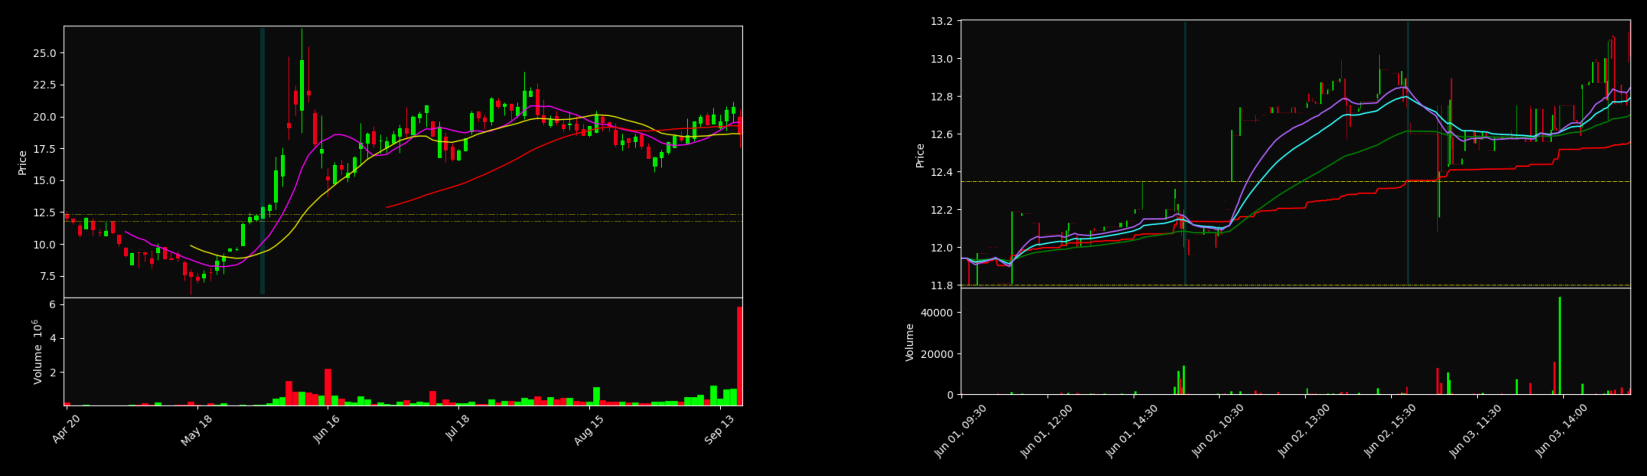

DCFC (2022-05-27)
<class 'ValueError'>
User specified line date "2022-05-20 16:00:00" is beyond (greater than) range of plotted data (2022-05-19 09:30:00 to 2022-05-20 15:57:00).
<Response [200]>
{"payload":[{"symbol":null,"open":8.25,"high":8.25,"low":8.25,"close":8.25,"volume":1196,"tickTime":"2022-05-19T09:30:00"},{"symbol":null,"open":8.25,"high":8.25,"low":8.25,"close":8.25,"volume":0,"tickTime":"2022-05-19T09:33:00"},{"symbol":null,"open":8.25,"high":8.25,"low":8.21,"close":8.21,"volume":537,"tickTime":"2022-05-19T09:36:00"},{"symbol":null,"open":8.21,"high":8.21,"low":8.21,"close":8.21,"volume":0,"tickTime":"2022-05-19T09:39:00"},{"symbol":null,"open":8.3,"high":8.3,"low":8.19,"close":8.19,"volume":2778,"tickTime":"2022-05-19T09:42:00"},{"symbol":null,"open":8.14,"high":8.14,"low":8.08,"close":8.08,"volume":445,"tickTime":"2022-05-19T09:45:00"},{"symbol":null,"open":8.07,"high":8.07,"low":7.95,"close":7.95,"volume":2143,"tickTime":"2022-05-19T09:48:00"},{"symbol":null,"open":7.9

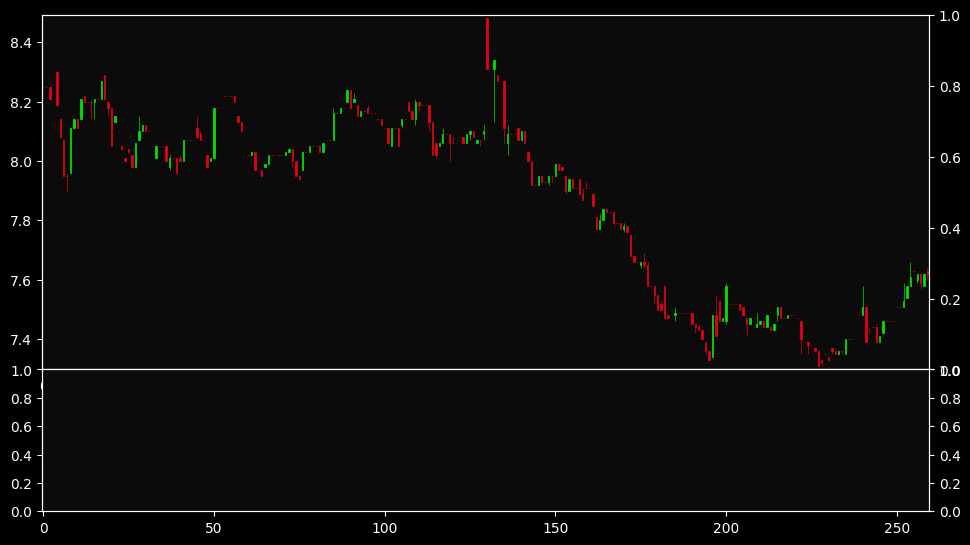

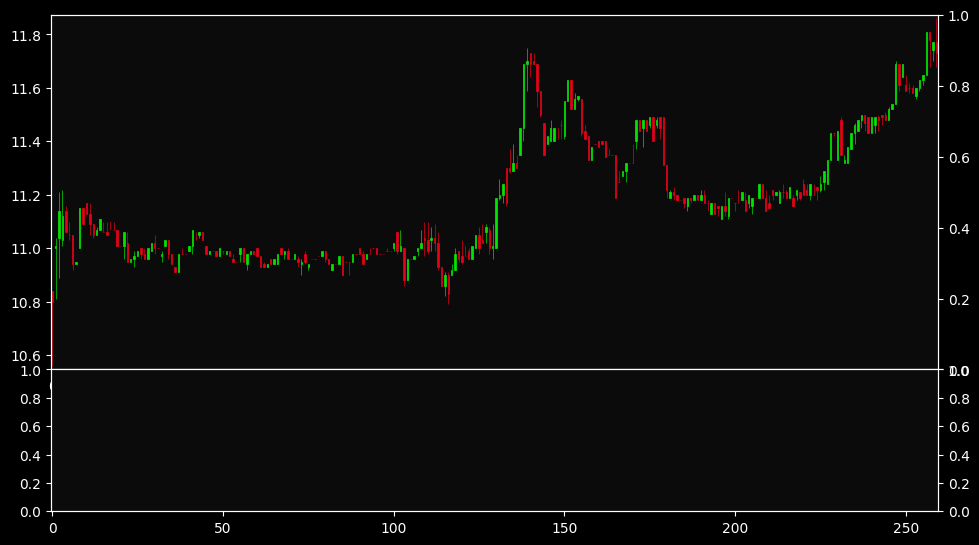

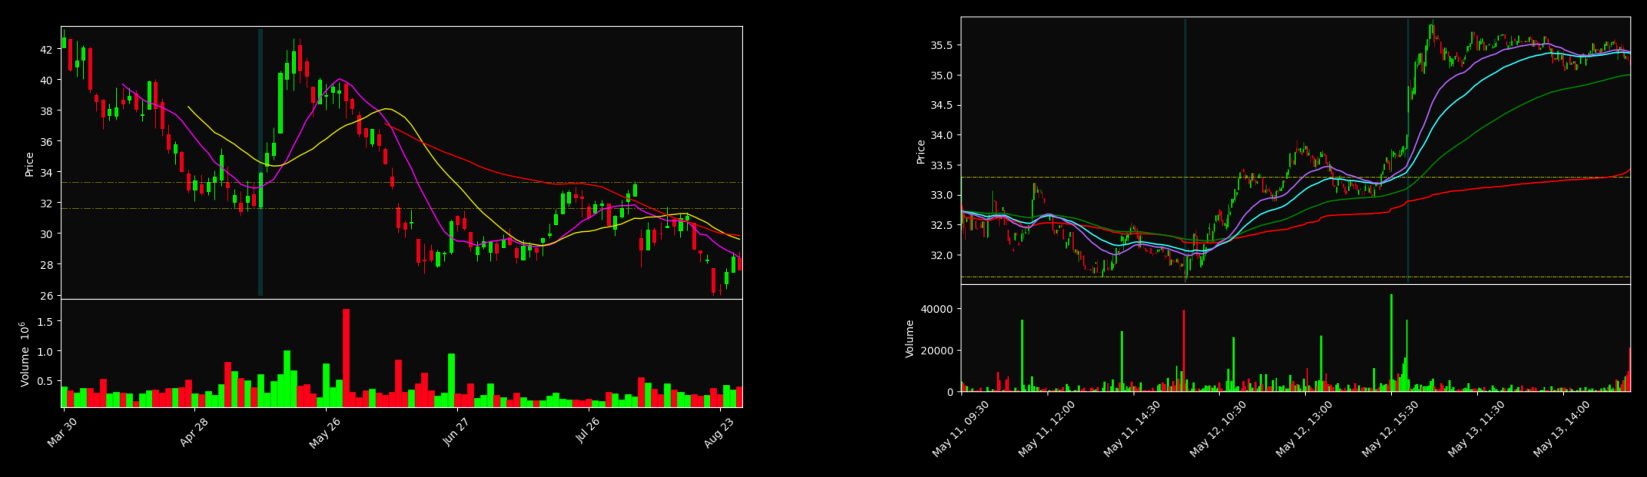

SOFI (2022-05-19)


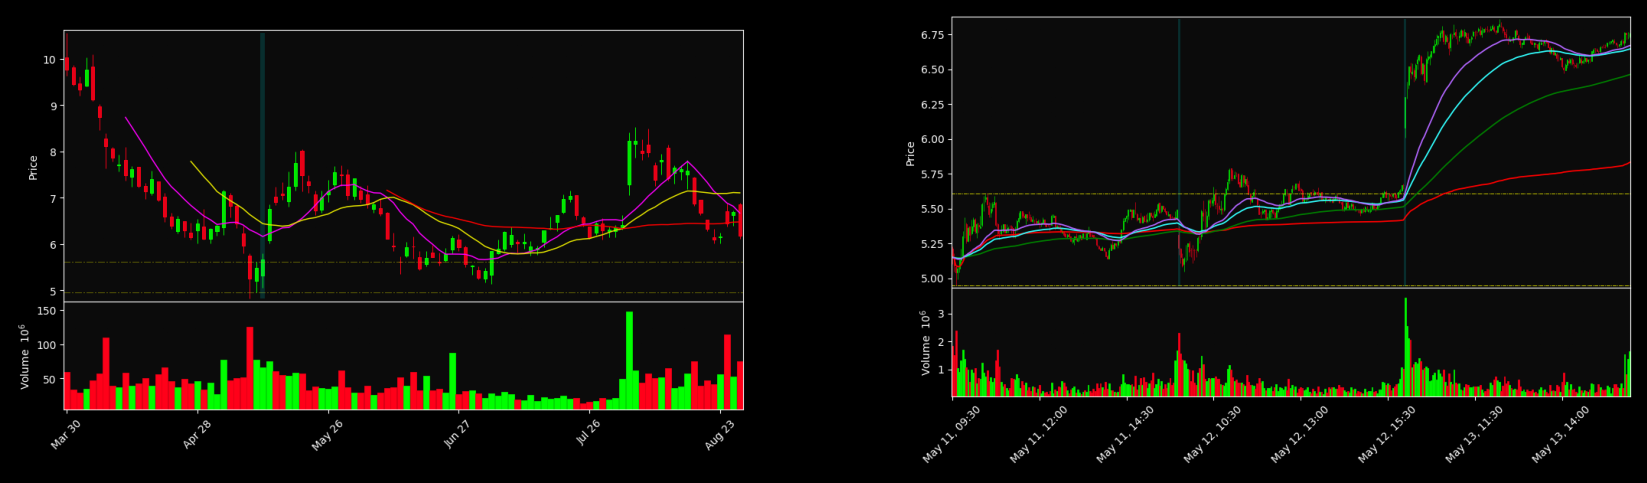

DRV (2022-05-11)


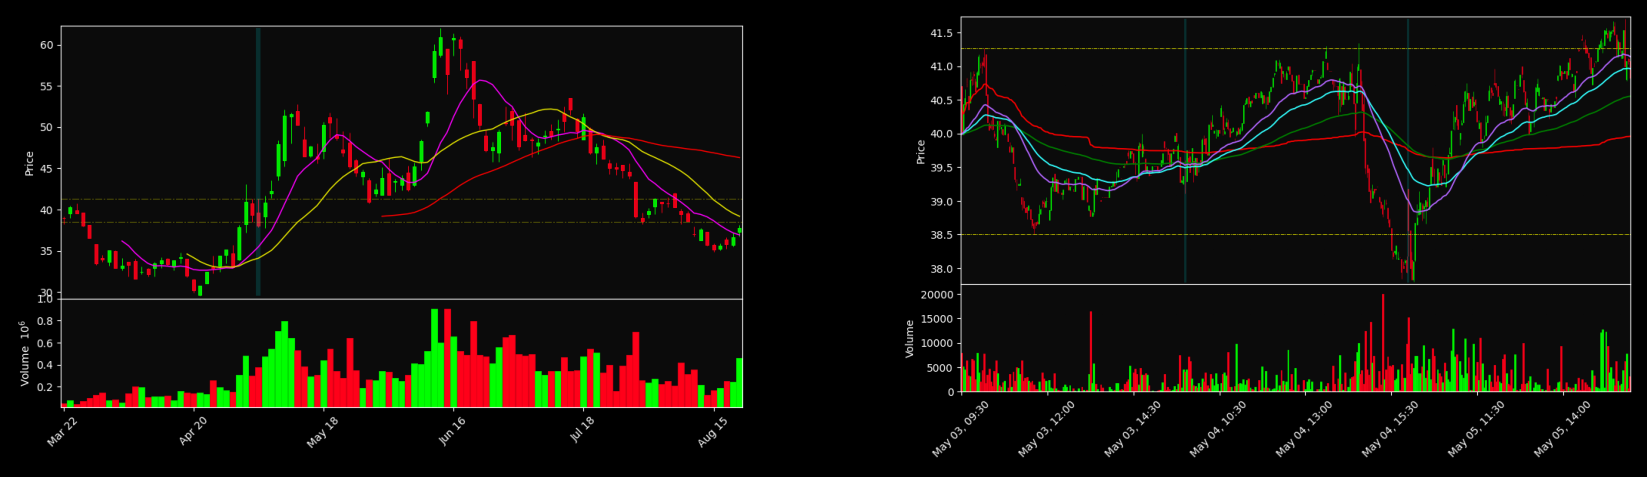

MNTK (2022-05-04)


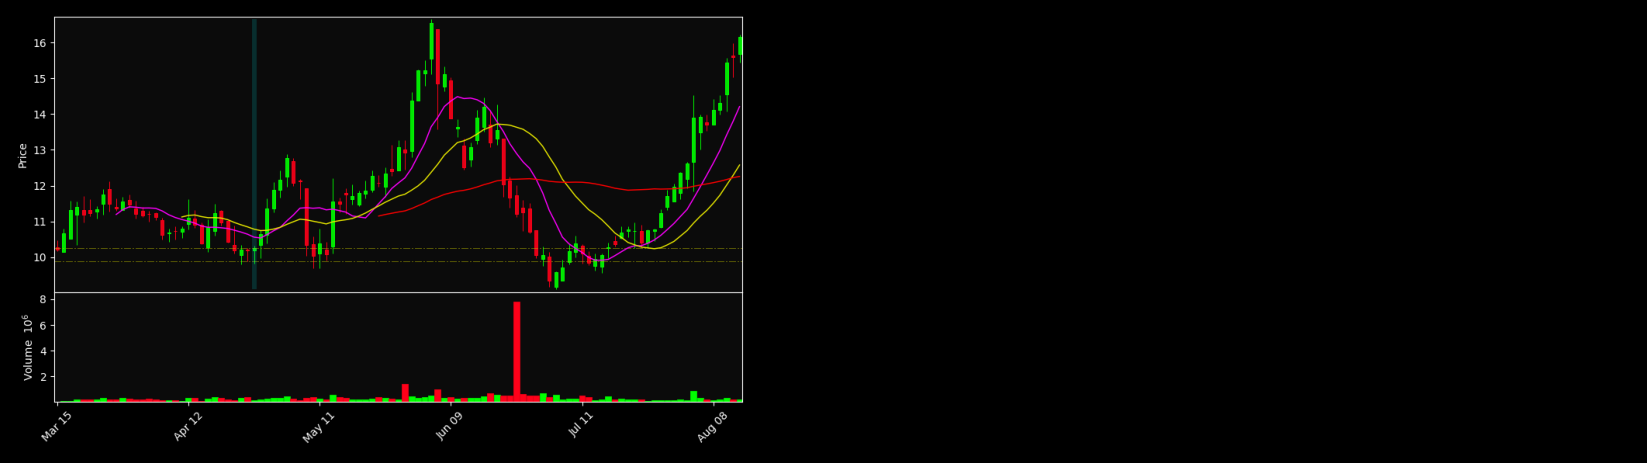

INVZ (2022-05-03)


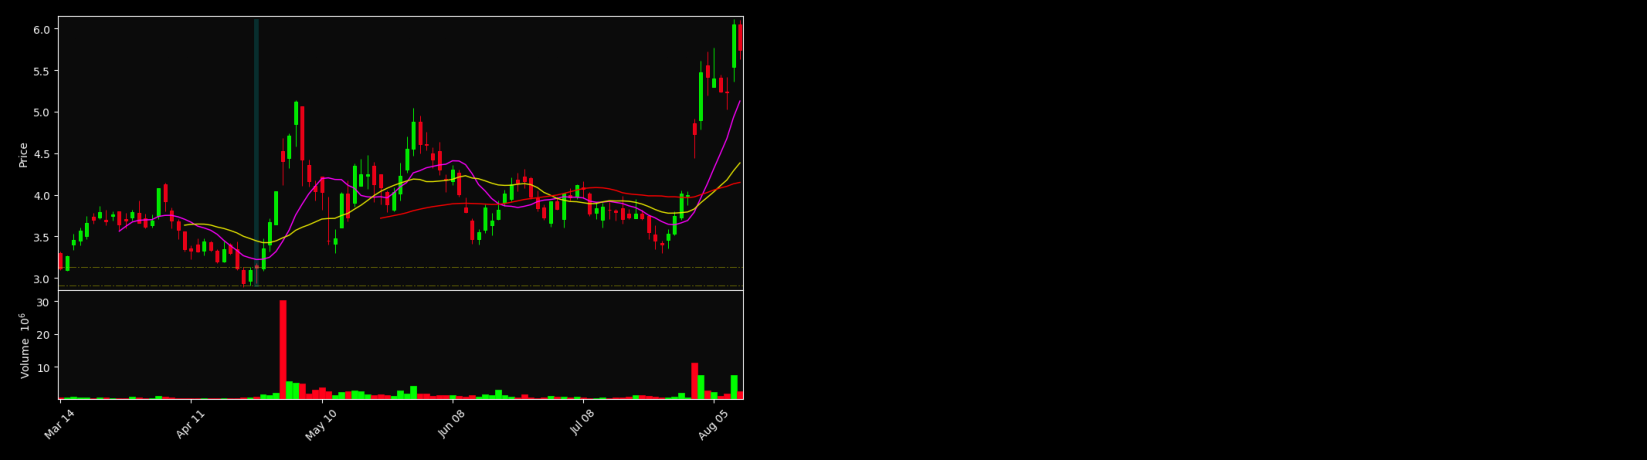

STRY (2022-04-29)


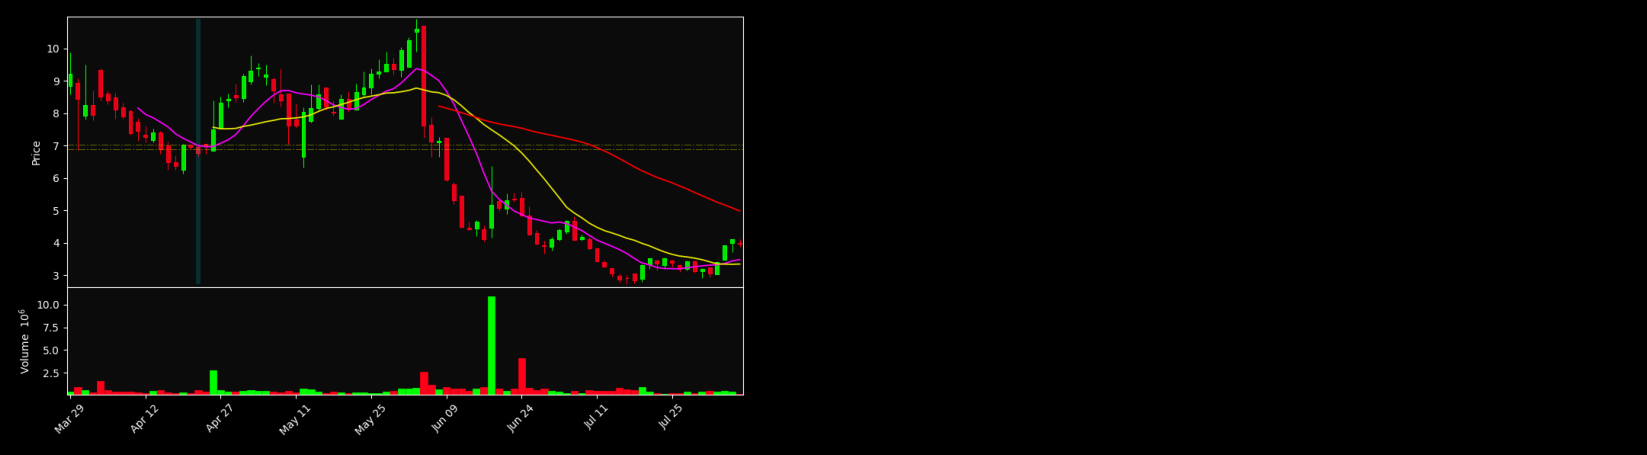

In [38]:
entryOffset = -5
mc = mpf.make_marketcolors(up='#00ff00',down='#ff0019',inherit=True)
mstyledaily  = mpf.make_mpf_style(
    base_mpf_style='nightclouds', 
    mavcolors=['magenta','#e6e600','red','green'],
    marketcolors=mc,
    gridcolor='#0b0b0b'
  )
mstyleintra = mpf.make_mpf_style(
    base_mpf_style='nightclouds', 
    mavcolors=['magenta','#e6e600','red','green'],
    marketcolors=mc,
    gridcolor='#0b0b0b'
  )

for index, row in df.iterrows():
    
    ######################################################
    # fetch daily
    ######################################################
    start = (row['patternTime'] + pd.DateOffset(days=-50)).strftime('%Y-%m-%d')
    end = (row['patternTime'] + pd.DateOffset(days=100)).strftime('%Y-%m-%d')

    url = baseurl + '/chart/' + row['symbol'] + '/d?from=' + encodeUrl(start) + '&to=' + encodeUrl(end)
    chartResponse = requests.get(url)
    chartDf = None
    try:
      chartDf = pd.DataFrame(chartResponse.json()['payload'])
    except Exception as e:
      print(e.__class__)
      print(e)
      print(chartResponse)
      print(chartResponse.text)
      break
    
    chartDf.tickTime = pd.to_datetime(chartDf.tickTime)
    chartDf = chartDf.set_index('tickTime')

    entryDate = row['patternTime']
    entryStr = entryDate.strftime('%Y-%m-%d')
    if (entryOffset!=0):
      idx = chartDf.index.get_loc(entryStr)
      entryStr = chartDf.iloc[[idx+entryOffset]].index.format()[0]
      entryDate = datetime.strptime(entryStr, '%Y-%m-%d')

    print(row['symbol'] + ' (' + row['patternTime'].strftime('%Y-%m-%d') + ')')

    # print('prevday: ' + str(chartDf.iloc[[idx+entryOffset-1]]))
    hlines=(chartDf.iloc[[idx+entryOffset-1]]['low'].values[0], chartDf.iloc[[idx+entryOffset-1]]['high'].values[0])

    addplot = [
        # mpf.make_addplot(chartDf['close'].ewm(span=10, adjust=False).mean(), color='magenta'),
        # mpf.make_addplot(chartDf['close'].ewm(span=21, adjust=False).mean(), color='#e6e600'),
        # mpf.make_addplot(chartDf['close'].ewm(span=50, adjust=False).mean(), color='red'),
        # mpf.make_addplot(chartDf['close'].ewm(span=200,adjust=False).mean(), color='green'),
        # mpf.make_addplot(entryPoint1, scatter=True,  type='scatter', markersize=200, marker=entryMarker, color=entryColor),
        # mpf.make_addplot(entryPoint2, scatter=True,  type='scatter', markersize=50, marker='.', color=entryColor)
    ]

    imgDailyPlot = io.BytesIO()
    mpf.plot(chartDf[start:end], 
             type='candle', 
             volume=True, 
             mav=(10,20,50,200),
             tight_layout=True, 
             figratio=(16,9), 
             addplot=addplot,
             savefig=imgDailyPlot,
             style=mstyledaily,
             hlines=dict(hlines=hlines,colors='y',linewidths=1,alpha=0.5,linestyle='-.'),
             vlines=dict(vlines=[entryStr],colors='c',linewidths=4,alpha=0.2))
    _ = imgDailyPlot.seek(0)

    ######################################################
    # fetch intraday
    ######################################################
    start = (entryDate + pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
    end = (entryDate + pd.DateOffset(days=1)).strftime('%Y-%m-%d')

    url = baseurl + '/chart/' + row['symbol'] + '/3m?from=' + encodeUrl(start) + '&to=' + encodeUrl(end)

    imgIntradayPlot = io.BytesIO()
    chartDf = None
    try:
      chartResponse = requests.get(url)
      if chartResponse.status_code != 200:
        imgIntradayPlot = 'dummy.png'
      else:
        chartDf = pd.DataFrame(chartResponse.json()['payload'])
        chartDf.tickTime = pd.to_datetime(chartDf.tickTime)
        chartDf = chartDf.set_index('tickTime')
        chartDf['VWAP'] = (chartDf.volume * (chartDf.high + chartDf.low) / 2).cumsum() / chartDf.volume.cumsum()

        entryStr = entryDate.replace(hour=9, minute=30)

        addplot  = [
            mpf.make_addplot(chartDf['VWAP'], color="red"),
            mpf.make_addplot(chartDf['close'].ewm(span=150, adjust=False).mean(), color='green'),
            mpf.make_addplot(chartDf['close'].ewm(span=63, adjust=False).mean(), color='#33ffff'),
            mpf.make_addplot(chartDf['close'].ewm(span=36, adjust=False).mean(), color='#b266ff'),
        ]

        vlines=[entryStr, entryDate.replace(hour=16, minute=0)]

        mpf.plot(chartDf[start:end], 
                type='candle', 
                volume=True, 
                tight_layout=True, 
                figratio=(16,9),
                savefig=imgIntradayPlot,
                addplot=addplot,
                style=mstyleintra,
                hlines=dict(hlines=hlines,colors='y',linewidths=(0.5),linestyle='-.'),
                vlines=dict(vlines=vlines,colors='c',linewidths=(2),alpha=0.2))
        _ = imgIntradayPlot.seek(0)
    except Exception as e:
      print(e.__class__)
      print(e)
      print(chartResponse)
      print(chartResponse.text)
      continue

    ######################################################
    # render candlestick & perf charts
    ######################################################
    # daily & intraday charts
    img1 = m_img.imread(imgDailyPlot)
    img2 = m_img.imread(imgIntradayPlot)
    fig = plt.figure(figsize=(21,14))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax1.set_axis_off()
    ax2.set_axis_off()
    ax1.imshow(img1)
    ax2.imshow(img2)
    plt.show()
